## IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

#ignorar advertencias
pd.options.mode.chained_assignment = None

## IMPORTAMOS DATASET PARA ANALIZAR

In [2]:
#importar los datos de los crimenes de Chicago
chicago_data = "/Users/oscar_sanchez/Desktop/TFG/CHICAGO/src/city_of_chicago_crimes_2001_to_present.csv"
df_crimes = pd.read_csv(chicago_data, encoding='latin1')

In [3]:
df_crimes

ID Case Number                    Date                   Block  \
0        10000092    HY189866  03/18/2015 07:44:00 PM         047XX W OHIO ST   
1        10000094    HY190059  03/18/2015 11:00:00 PM  066XX S MARSHFIELD AVE   
2        10000095    HY190052  03/18/2015 10:45:00 PM   044XX S LAKE PARK AVE   
3        10000096    HY190054  03/18/2015 10:30:00 PM    051XX S MICHIGAN AVE   
4        10000097    HY189976  03/18/2015 09:00:00 PM        047XX W ADAMS ST   
...           ...         ...                     ...                     ...   
6747035  11510575    JB519248  11/01/2018 09:00:00 AM      041XX N KEDZIE AVE   
6747036  11510612    JB520368  11/06/2018 04:00:00 AM    122XX S ELIZABETH ST   
6747037  11510614    JB519499  10/02/2018 11:00:00 AM        126XX S YALE AVE   
6747038     24288    JB511933  11/11/2018 12:23:00 PM      014XX S KARLOV AVE   
6747039     24289    JB512377  11/11/2018 07:56:00 PM       046XX S LAMON AVE   

         IUCR        Primary Type                          Description  \
0        041A             BATTERY                  AGGRAVATED: HANDGUN   
1        4625       OTHER OFFENSE                     PAROLE VIOLATION   
2        0486             BATTERY              DOMESTIC BATTERY SIMPLE   
3        0460             BATTERY                               SIMPLE   
4        031A             ROBBERY                       ARMED: HANDGUN   
...       ...                 ...                                  ...   
6747035  1153  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
6747036  0610            BURGLARY                       FORCIBLE ENTRY   
6747037  0560             ASSAULT                               SIMPLE   
6747038  0110            HOMICIDE                  FIRST DEGREE MURDER   
6747039  0110            HOMICIDE                  FIRST DEGREE MURDER   

        Location Description  Arrest  Domestic  ...  Ward  Community Area  \
0                     STREET   False     False  ...  28.0            25.0   
1                     STREET    True     False  ...  15.0            67.0   
2                  APARTMENT   False      True  ...   4.0            39.0   
3                  APARTMENT   False     False  ...   3.0            40.0   
4                   SIDEWALK   False     False  ...  28.0            25.0   
...                      ...     ...       ...  ...   ...             ...   
6747035                OTHER   False     False  ...  33.0            16.0   
6747036            RESIDENCE   False     False  ...  34.0            53.0   
6747037            RESIDENCE   False     False  ...   9.0            53.0   
6747038           VACANT LOT   False     False  ...  24.0            29.0   
6747039               STREET   False     False  ...  22.0            56.0   

         FBI Code  X Coordinate Y Coordinate  Year              Updated On  \
0             04B     1144606.0    1903566.0  2015  02/10/2018 03:50:01 PM   
1              26     1166468.0    1860715.0  2015  02/10/2018 03:50:01 PM   
2             08B     1185075.0    1875622.0  2015  02/10/2018 03:50:01 PM   
3             08B     1178033.0    1870804.0  2015  02/10/2018 03:50:01 PM   
4              03     1144920.0    1898709.0  2015  02/10/2018 03:50:01 PM   
...           ...           ...          ...   ...                     ...   
6747035        11           NaN          NaN  2018  11/18/2018 04:11:31 PM   
6747036        05           NaN          NaN  2018  11/18/2018 04:11:31 PM   
6747037       08A           NaN          NaN  2018  11/18/2018 04:11:31 PM   
6747038       01A     1149281.0    1892881.0  2018  11/18/2018 04:11:31 PM   
6747039       01A     1144471.0    1873475.0  2018  11/18/2018 04:11:31 PM   

          Latitude  Longitude                       Location  
0        41.891399 -87.744385  (41.891398861, -87.744384567)  
1        41.773372 -87.665319  (41.773371528, -87.665319468)  
2        41.813861 -87.596643   (41.81386068, -87.596642837)  
3        41.800802 -87.622619  (41.8008

## LIMPIAMOS DATASET

Primero miramos cual de todos los crimenes son los que nos interesan de todo el dataset y cambiamos el nombre para que quede mas claro.

In [4]:
df_crimes['Primary Type'].unique()

array(['BATTERY', 'OTHER OFFENSE', 'ROBBERY', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'THEFT', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION',
       'DECEPTIVE PRACTICE', 'ASSAULT', 'CRIMINAL TRESPASS',
       'CRIM SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER', 'ARSON',
       'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'HOMICIDE',
       'GAMBLING', 'INTIMIDATION', 'STALKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING',
       'CONCEALED CARRY LICENSE VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'],
      dtype=object)

In [5]:
df_crimes.replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', inplace=True)
df_crimes['Primary Type'].unique()

array(['BATTERY', 'OTHER OFFENSE', 'ROBBERY', 'NARCOTICS',
       'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'THEFT', 'BURGLARY',
       'MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION',
       'DECEPTIVE PRACTICE', 'ASSAULT', 'CRIMINAL TRESPASS',
       'CRIMINAL SEXUAL ASSAULT', 'INTERFERENCE WITH PUBLIC OFFICER',
       'ARSON', 'LIQUOR LAW VIOLATION', 'KIDNAPPING', 'SEX OFFENSE',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'HOMICIDE',
       'GAMBLING', 'INTIMIDATION', 'STALKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING',
       'CONCEALED CARRY LICENSE VIOLATION', 'OTHER NARCOTIC VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'DOMESTIC VIOLENCE'],
      dtype=object)

Para facilitar el uso de fechas durante el desarrollo del proyecto, transformamos la columna 'Date' en dos columnas nuevas 'Dates' y 'Time', la primera sera la fecha y la segunda el tiempo.

In [6]:
df_crimes['Date'] = pd.to_datetime(df_crimes['Date'], format = "%m/%d/%Y %I:%M:%S %p", utc = True)
df_crimes['Dates'] = pd.to_datetime(df_crimes['Date']).dt.date
df_crimes['Time'] = pd.to_datetime(df_crimes['Date']).dt.time

df_crimes = df_crimes.drop('Date', axis=1) # eliminar columna

In [7]:
df_crimes

ID Case Number                   Block  IUCR  \
0        10000092    HY189866         047XX W OHIO ST  041A   
1        10000094    HY190059  066XX S MARSHFIELD AVE  4625   
2        10000095    HY190052   044XX S LAKE PARK AVE  0486   
3        10000096    HY190054    051XX S MICHIGAN AVE  0460   
4        10000097    HY189976        047XX W ADAMS ST  031A   
...           ...         ...                     ...   ...   
6747035  11510575    JB519248      041XX N KEDZIE AVE  1153   
6747036  11510612    JB520368    122XX S ELIZABETH ST  0610   
6747037  11510614    JB519499        126XX S YALE AVE  0560   
6747038     24288    JB511933      014XX S KARLOV AVE  0110   
6747039     24289    JB512377       046XX S LAMON AVE  0110   

               Primary Type                          Description  \
0                   BATTERY                  AGGRAVATED: HANDGUN   
1             OTHER OFFENSE                     PAROLE VIOLATION   
2                   BATTERY              DOMESTIC BATTERY SIMPLE   
3                   BATTERY                               SIMPLE   
4                   ROBBERY                       ARMED: HANDGUN   
...                     ...                                  ...   
6747035  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
6747036            BURGLARY                       FORCIBLE ENTRY   
6747037             ASSAULT                               SIMPLE   
6747038            HOMICIDE                  FIRST DEGREE MURDER   
6747039            HOMICIDE                  FIRST DEGREE MURDER   

        Location Description  Arrest  Domestic  Beat  ...  FBI Code  \
0                     STREET   False     False  1111  ...       04B   
1                     STREET    True     False   725  ...        26   
2                  APARTMENT   False      True   222  ...       08B   
3                  APARTMENT   False     False   225  ...       08B   
4                   SIDEWALK   False     False  1113  ...        03   
...                      ...     ...       ...   ...  ...       ...   
6747035                OTHER   False     False  1724  ...        11   
6747036            RESIDENCE   False     False   524  ...        05   
6747037            RESIDENCE   False     False   523  ...       08A   
6747038           VACANT LOT   False     False  1011  ...       01A   
6747039               STREET   False     False   814  ...       01A   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0           1144606.0     1903566.0  2015  02/10/2018 03:50:01 PM  41.891399   
1           1166468.0     1860715.0  2015  02/10/2018 03:50:01 PM  41.773372   
2           1185075.0     1875622.0  2015  02/10/2018 03:50:01 PM  41.813861   
3           1178033.0     1870804.0  2015  02/10/2018 03:50:01 PM  41.800802   
4           1144920.0     1898709.0  2015  02/10/2018 03:50:01 PM  41.878065   
...               ...           ...   ...                     ...        ...   
6747035           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747036           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747037           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747038     1149281.0     1892881.0  2018  11/18/2018 04:11:31 PM  41.861989   
6747039     1144471.0     1873475.0  2018  11/18/2018 04:11:31 PM  41.808828   

         Longitude                       Location       Dates      Time  
0       -87.744385  (41.891398861, -87.744384567)  2015-03-18  19:44:00  
1       -87.665319  (41.773371528, -87.665319468)  2015-03-18  23:00:00  
2       -87.596643   (41.81386068, -87.596642837)  2015-03-18  22:45:00  
3       -87.622619  (41.800802415, -87.622619343)  2015-03-18  22:30:00  
4       -87.743354  (41.878064761, -87.743354013)  2015-03-18  21:00:00  
...            ...                            ...         ...       ...  
6747035        NaN                            NaN  2018-11-01  09:00:00  
6747036        NaN                 

### FILTRAMOS DATASET PARA COGER LOS DATOS QUE INTERESAN

In [8]:
selected_types = ['CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE']
descriptions = ['PUBLIC INDECENCY', 'SEXUAL EXPLOITATION OF A CHILD', 
       'INDECENT SOLICITATION/CHILD', 'CRIMINAL TRANSMISSION OF HIV',
       'INDECENT SOLICITATION OF A CHILD', 'FORNICATION', 'BIGAMY',
        'MARRYING A BIGAMIST']

# Filtrar el DataFrame
filtered_df = df_crimes[
    (df_crimes['Primary Type'].isin(selected_types)) &
    (~df_crimes['Description'].isin(descriptions))
]

In [9]:
filtered_df

ID Case Number                  Block  IUCR  \
37       10000142    HY190058    095XX S MERRION AVE  0281   
56       10000171    HY190088       020XX N CLARK ST  0281   
186      10000682    HY190416        028XX W POLK ST  1562   
253      10000857    HY190486       014XX S CANAL ST  0281   
478      10001311    HY190951     069XX S JUSTINE ST  0281   
...           ...         ...                    ...   ...   
6747000  11509214    JB518490      048XX W FIFTH AVE  0281   
6747019  11510068    JB519456      026XX N HOYNE AVE  0266   
6747020  11510069    JB519454      026XX N HOYNE AVE  0281   
6747027  11510198    JB519809  047XX N MILWAUKEE AVE  5004   
6747034  11510450    JB520200  015XX W GREENLEAF AVE  0265   

                    Primary Type                Description  \
37       CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
56       CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
186                  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
253      CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
478      CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
...                          ...                        ...   
6747000  CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
6747019  CRIMINAL SEXUAL ASSAULT                  PREDATORY   
6747020  CRIMINAL SEXUAL ASSAULT             NON-AGGRAVATED   
6747027              SEX OFFENSE      ATT CRIM SEXUAL ABUSE   
6747034  CRIMINAL SEXUAL ASSAULT          AGGRAVATED: OTHER   

        Location Description  Arrest  Domestic  Beat  ...  FBI Code  \
37                 APARTMENT   False     False   431  ...        02   
56                     OTHER   False     False  1814  ...        02   
186                RESIDENCE   False     False  1135  ...        17   
253                    OTHER   False     False   124  ...        02   
478                RESIDENCE   False     False   734  ...        02   
...                      ...     ...       ...   ...  ...       ...   
6747000                OTHER   False     False  1533  ...        02   
6747019            RESIDENCE   False     False  1931  ...        02   
6747020            RESIDENCE   False     False  1931  ...        02   
6747027           DRUG STORE   False     False  1623  ...        17   
6747034            RESIDENCE   False     False  2423  ...        02   

         X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
37          1192651.0     1842233.0  2015  02/10/2018 03:50:01 PM  41.722057   
56          1173852.0     1913957.0  2015  02/10/2018 03:50:01 PM  41.919311   
186         1157505.0     1896243.0  2015  02/10/2018 03:50:01 PM  41.871051   
253         1173362.0     1893147.0  2015  02/10/2018 03:50:01 PM  41.862218   
478         1167202.0     1858723.0  2015  02/10/2018 03:50:01 PM  41.767890   
...               ...           ...   ...                     ...        ...   
6747000           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747019           NaN           NaN  2017  11/18/2018 04:11:31 PM        NaN   
6747020           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747027           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   
6747034           NaN           NaN  2018  11/18/2018 04:11:31 PM        NaN   

         Longitude                       Location       Dates      Time  
37      -87.569941  (41.722057171, -87.569940988)  2015-03-18  23:35:00  
56      -87.636668  (41.919311217, -87.636668238)  2015-03-18  14:30:00  
186     -87.697212  (41.871051124, -87.697211719)  2015-03-09  08:00:00  
253     -87.639087  (41.862218265, -87.639087164)  2015-03-19  06:00:00  
478     -87.662686  (41.767889544, -87.662685731)  2015-03-17  15:00:00  
...            ...                            ...         ...       ...  
6747000        NaN                            NaN  2018-11-11  00:01:00  
6747019        NaN                            NaN  2017-07-01  19:00:00  
6747020        NaN               

In [10]:
total_crimenes = len(df_crimes)
total_crimenes_sexuales = len(filtered_df)

porcentaje = (total_crimenes_sexuales / total_crimenes) * 100

print(f"De todos los crímenes de Chicago entre el 2001 y 2018, el {porcentaje:.2f}% corresponden a crimenes sexuales.")

De todos los crímenes de Chicago entre el 2001 y 2018, el 0.64% corresponden a crimenes sexuales.


## ANALISIS DE DATASET

Una vez limpiado el dataset de todo lo irrelevante, comenzaré a analizar el dataset filtrado para conseguir información relevante para posteriormente poder comenzar a desarrollar el modelo de predicción.

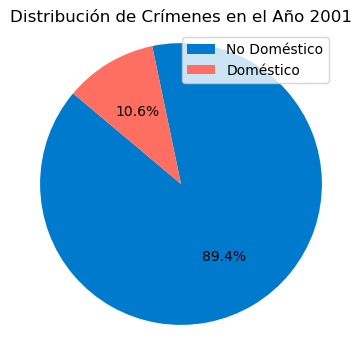

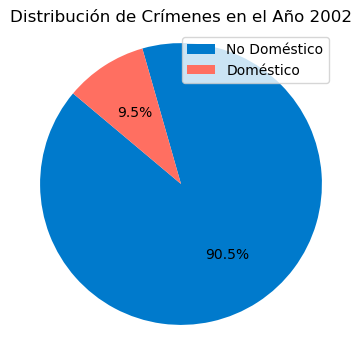

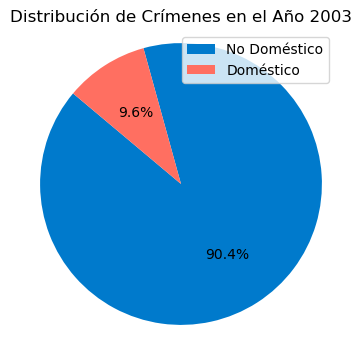

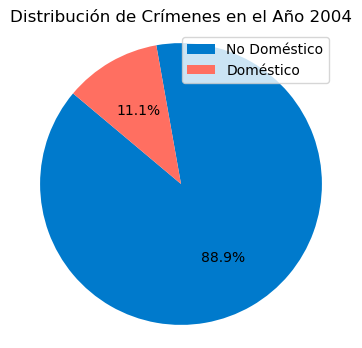

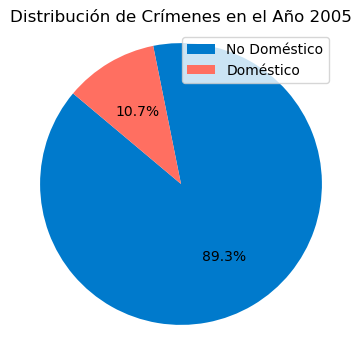

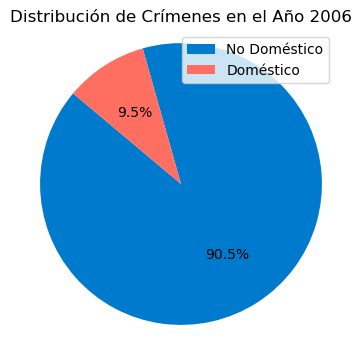

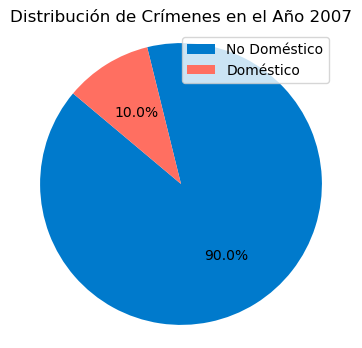

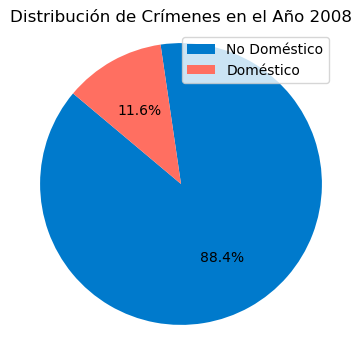

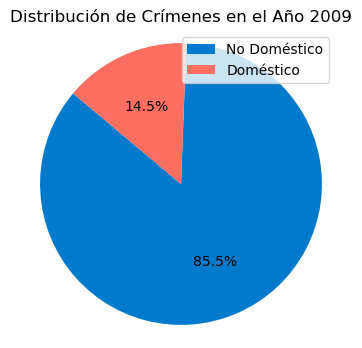

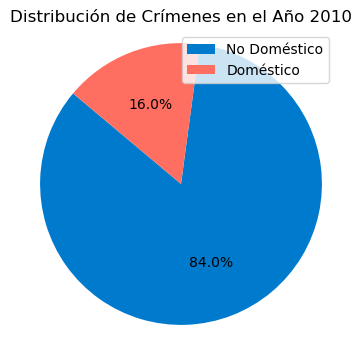

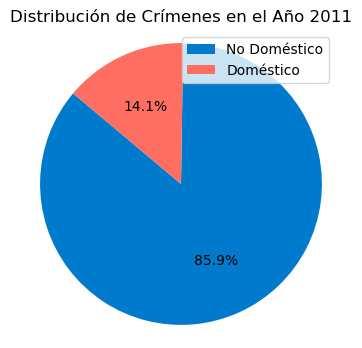

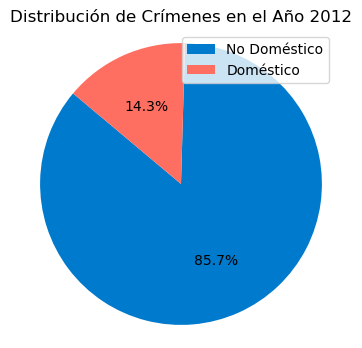

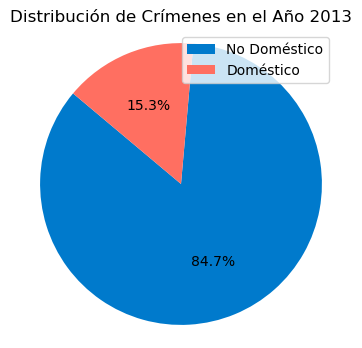

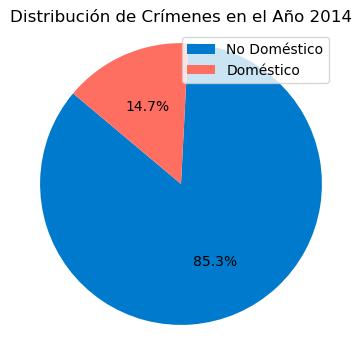

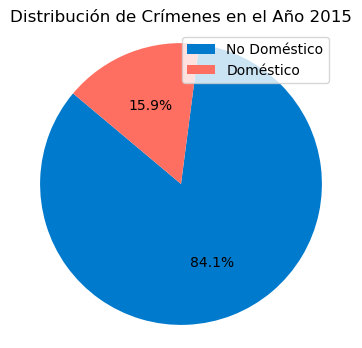

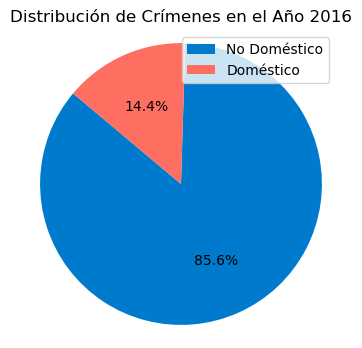

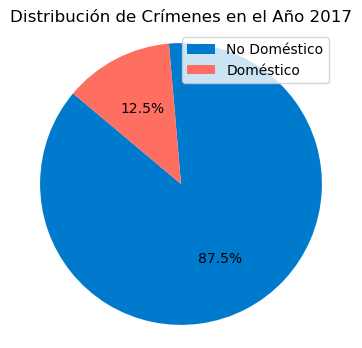

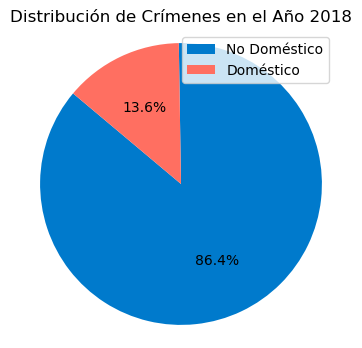

In [11]:
filtered_df['Dates'] = pd.to_datetime(filtered_df['Dates'])

all_years = sorted(filtered_df['Dates'] .dt.year.unique())

# Agrupa los datos por año y cuenta la cantidad de crímenes domésticos y no domésticos.
grouped = filtered_df.groupby(['Year', 'Domestic']).size().unstack(fill_value=0)

colors = ['#007ACC', '#FF6F61']

# Itera a través de los años y crea un gráfico de pastel para cada año con leyenda.
for year in all_years:
    year_data = grouped.loc[year]
    
    plt.figure(figsize=(4, 4))
    plt.pie(year_data, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Distribución de Crímenes en el Año {year}')
    plt.axis('equal')
    
    # Agregar una leyenda
    legend_labels = ['No Doméstico', 'Doméstico']
    plt.legend(legend_labels, loc='upper right')
    
    plt.show()

### CRIMINAL SEXUAL ASSAULT vs SEX OFFENSE

Para poder analizar profundamente la base de datos tenemos que analizar por separado los dos bloques que hemos escogido al inicio como relevantes para poder realizar el trabajo. Estos dos son 'CRIMINAL SEXUAL ASSAULT' y 'SEX OFFENSE'

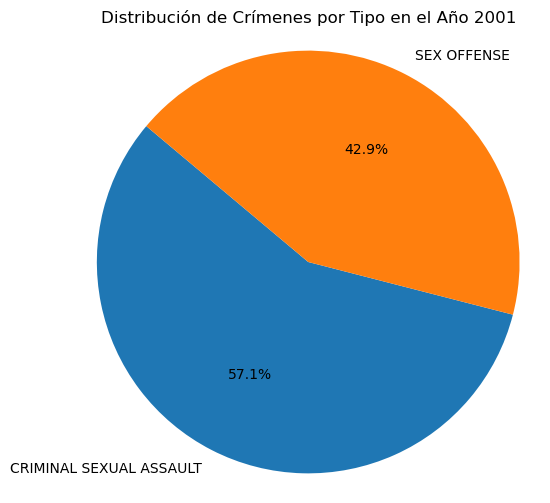

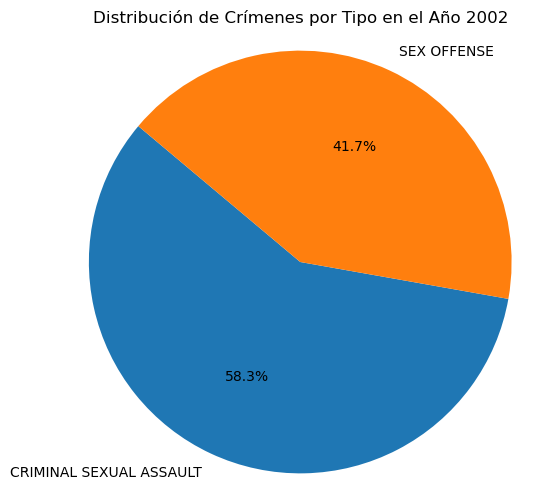

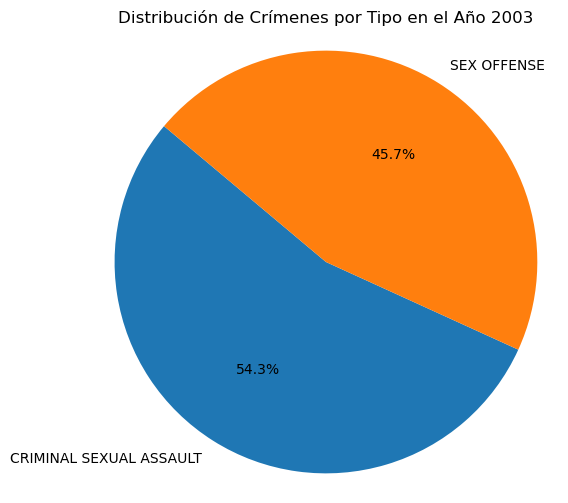

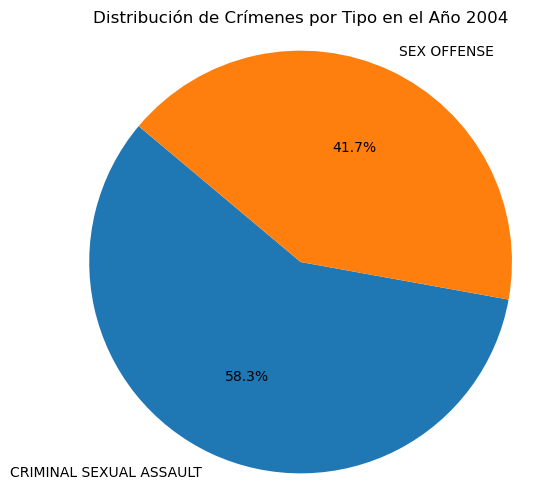

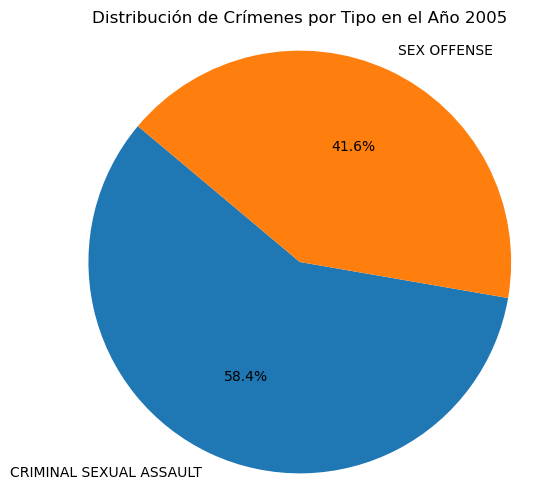

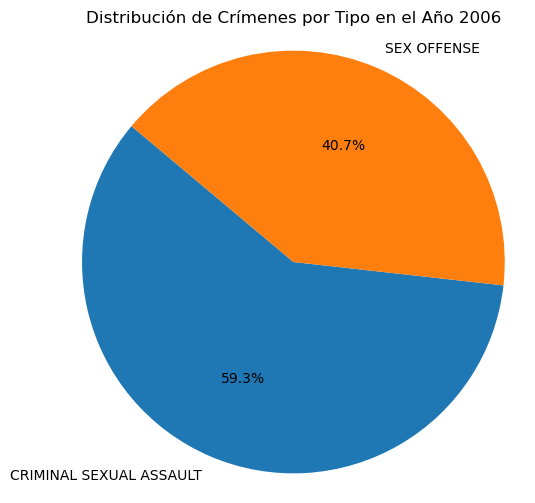

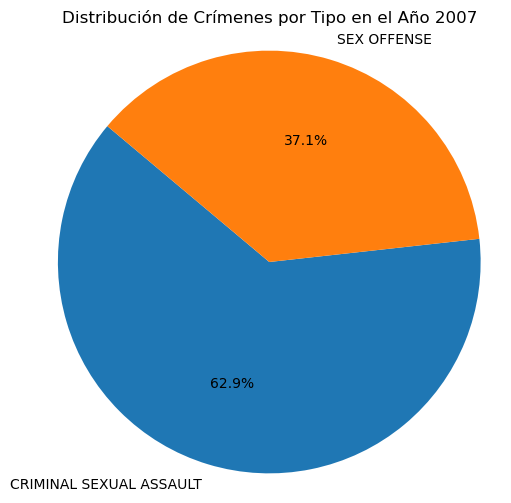

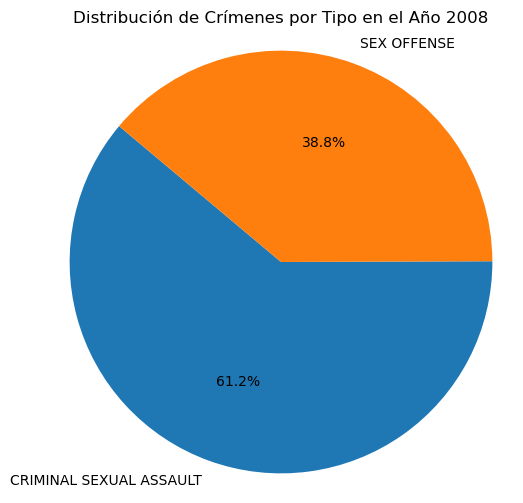

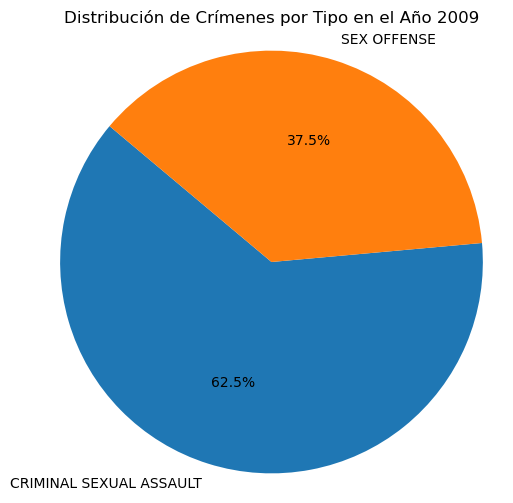

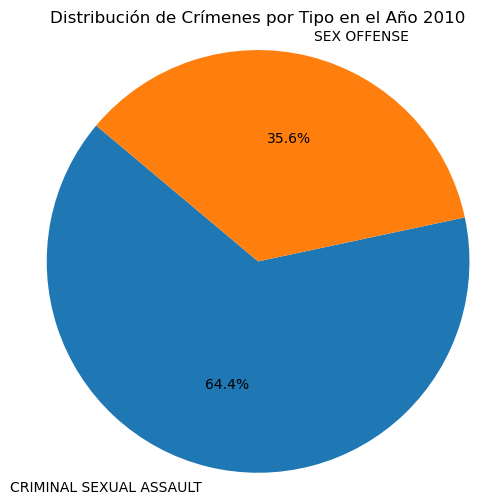

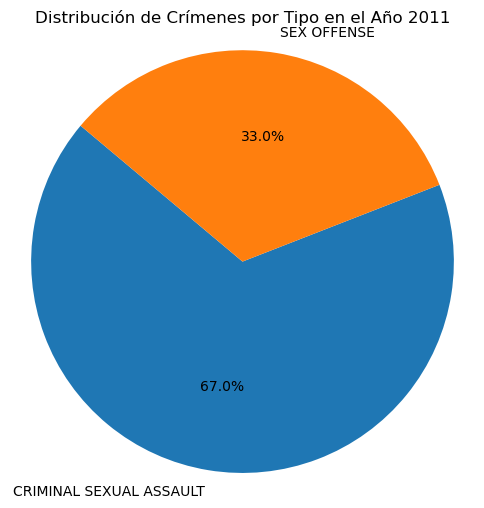

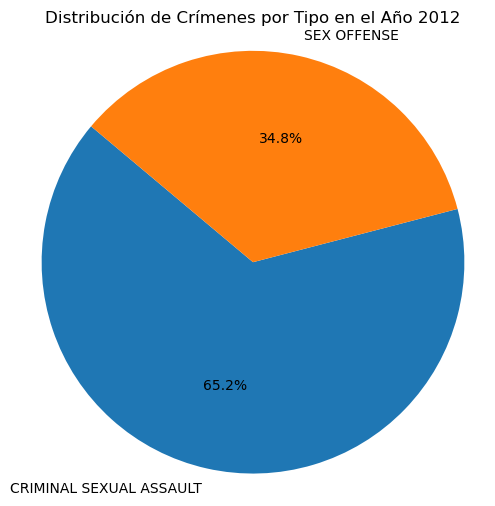

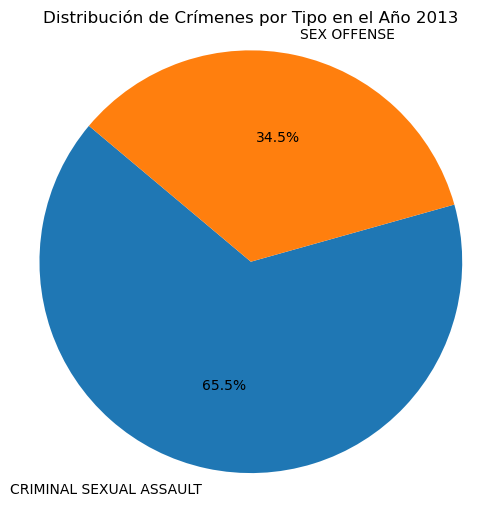

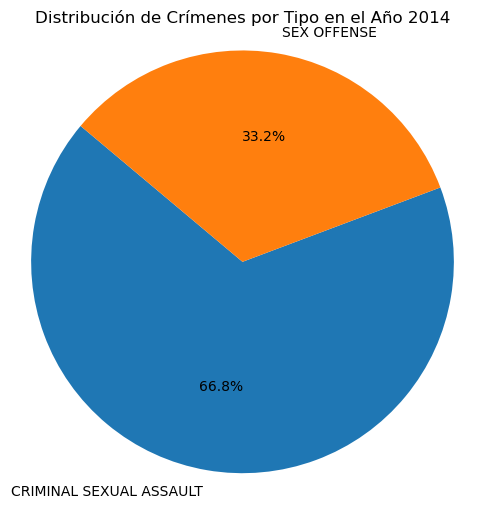

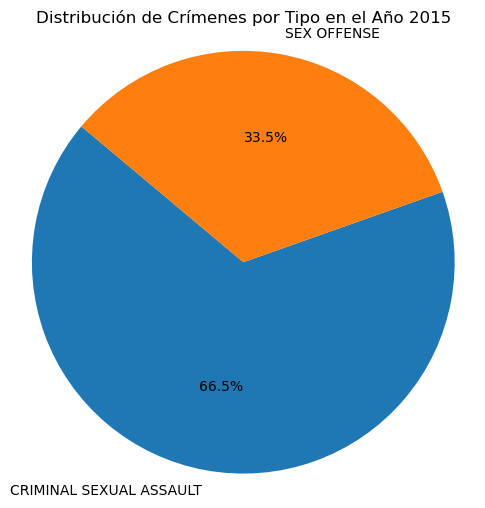

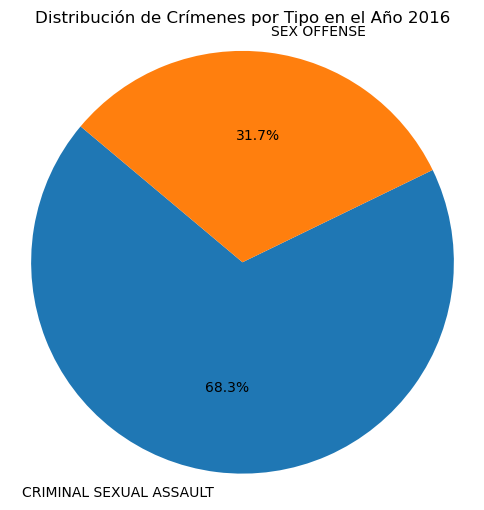

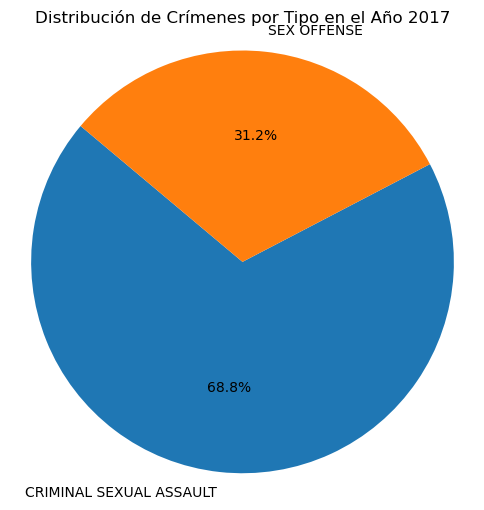

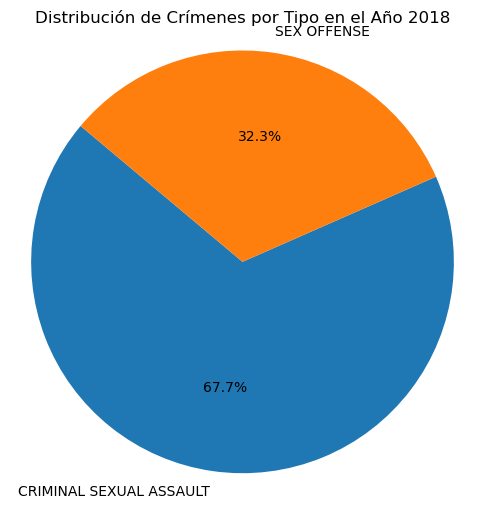

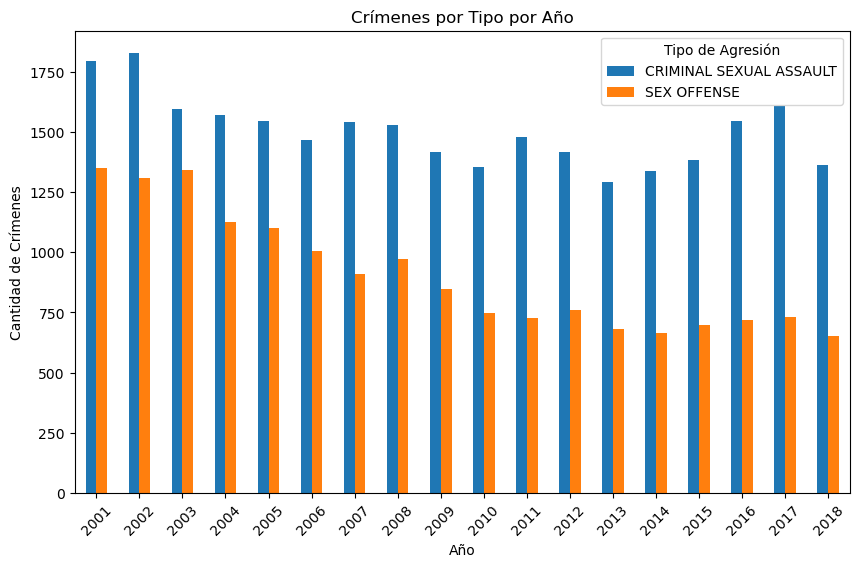

In [12]:
# Agrupa los datos por año y tipo de agresión y cuenta la cantidad de crímenes
crime_counts = filtered_df.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

# Crear gráfico de pastel por año
for year in all_years:
    year_data = crime_counts.loc[year]
    
    plt.figure(figsize=(6, 6))
    plt.pie(year_data, labels=year_data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribución de Crímenes por Tipo en el Año {year}')
    plt.axis('equal')
    plt.show()

# Crear gráfico de barras
crime_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Crímenes por Tipo por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Agresión')
plt.show()

### Ahora analizaremos el numero de agressiones

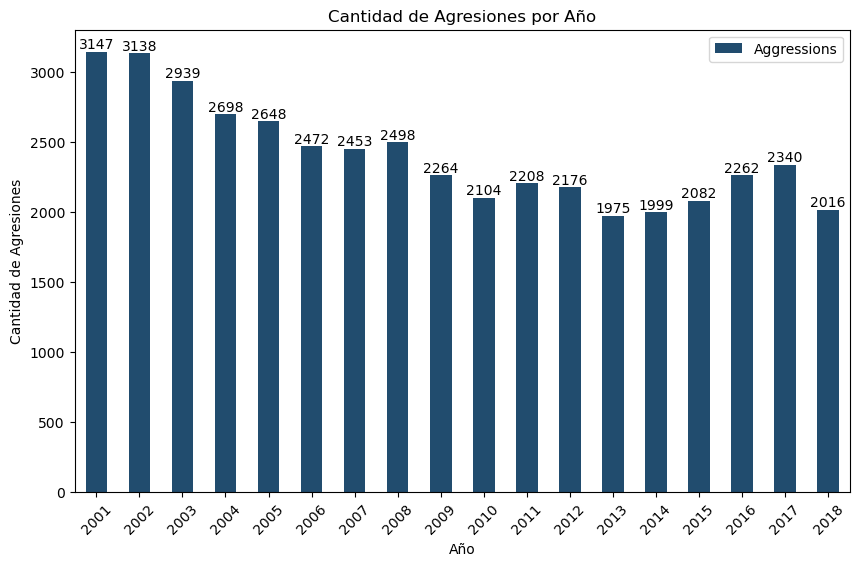

In [13]:
# contamos todas las agresiones que ha habido por año. 
df_years = filtered_df.groupby(filtered_df.Dates.dt.year).size().to_frame().rename(columns={0: 'Aggressions'})
df_years


# Elegir un color personalizado (por ejemplo, azul oscuro)
bar_color = '#214C6E'

# Crear un gráfico de barras con el color personalizado
ax = df_years.plot(kind='bar', figsize=(10, 6), color=bar_color)
plt.title('Cantidad de Agresiones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Agresiones')
plt.xticks(rotation=45)

# Agregar etiquetas con números en cada columna del histograma
for i, v in enumerate(df_years['Aggressions']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

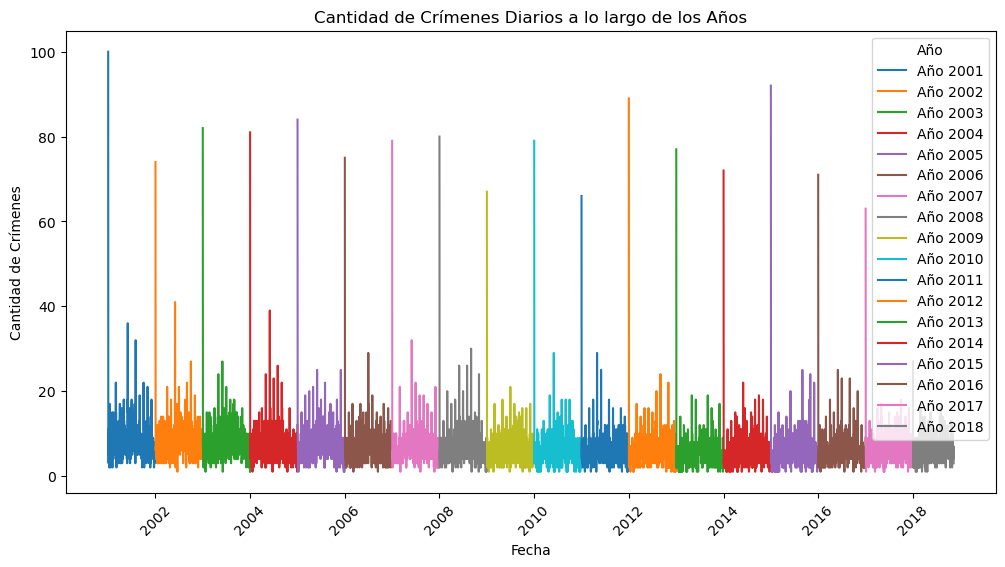

In [14]:
# Asegúrate de que la columna 'Dates' esté en formato datetime si no lo está ya.
filtered_df['Dates'] = pd.to_datetime(filtered_df['Dates'])

# Extrae los años de la columna 'Dates'
filtered_df['Year'] = filtered_df['Dates'].dt.year

# Agrupa los datos por día y cuenta la cantidad de crímenes
daily_crime_counts = filtered_df.groupby(['Year', filtered_df['Dates'].dt.date]).size()

# Crear una figura y ejes para la gráfica
plt.figure(figsize=(12, 6))

# Iterar a través de los años y trazar una línea para cada año
for year, data in daily_crime_counts.groupby(level=0):
    plt.plot(data.index.get_level_values(1), data.values, label=f'Año {year}')

# Configurar la apariencia de la gráfica
plt.title('Cantidad de Crímenes Diarios a lo largo de los Años')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Crímenes')
plt.xticks(rotation=45)
plt.legend(title='Año')

# Mostrar la gráfica
plt.show()




In [15]:
new_df = filtered_df.groupby(filtered_df.Dates).size().to_frame().rename(columns = {0:'Agressions'})
new_df

Agressions
Dates                 
2001-01-01         100
2001-01-02           5
2001-01-03          11
2001-01-04           3
2001-01-05           8
...                ...
2018-11-07           5
2018-11-08           5
2018-11-09           4
2018-11-10           7
2018-11-11           3

[6486 rows x 1 columns]

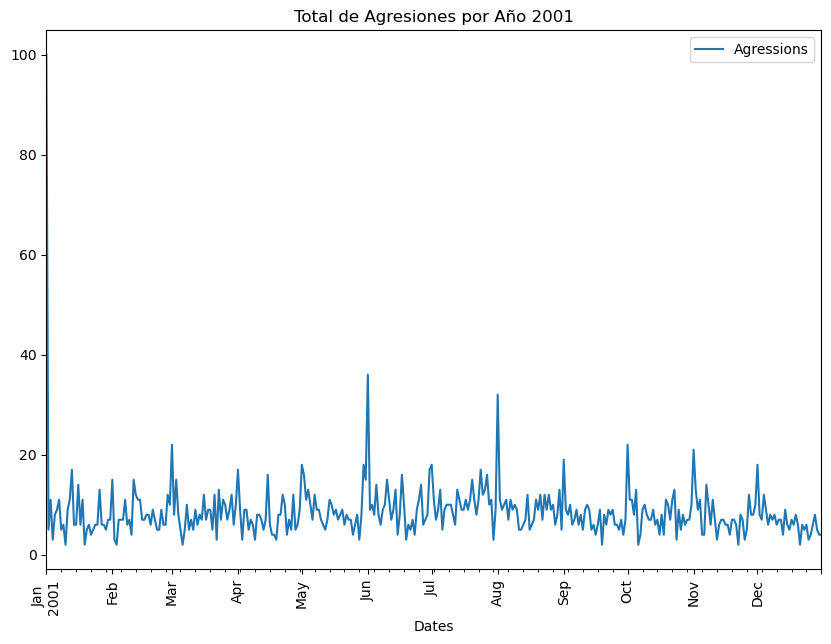

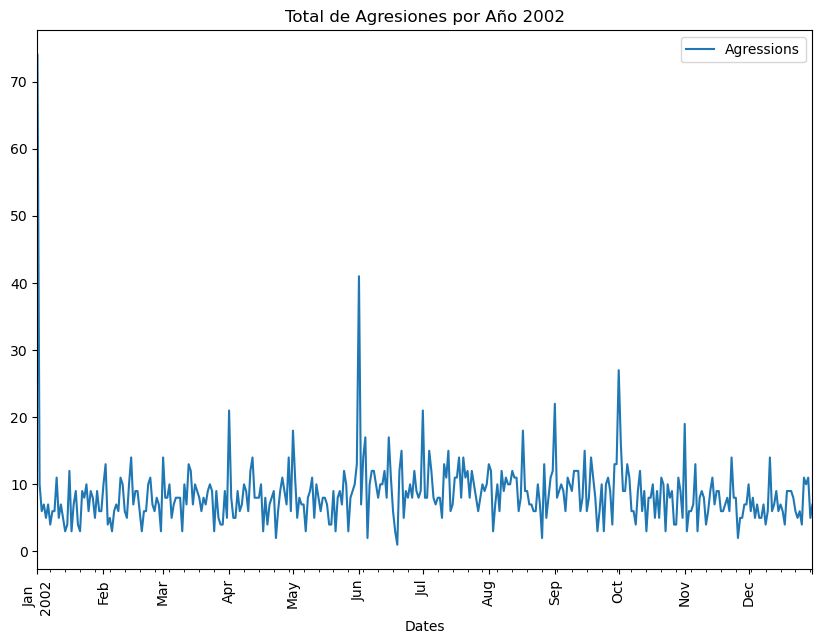

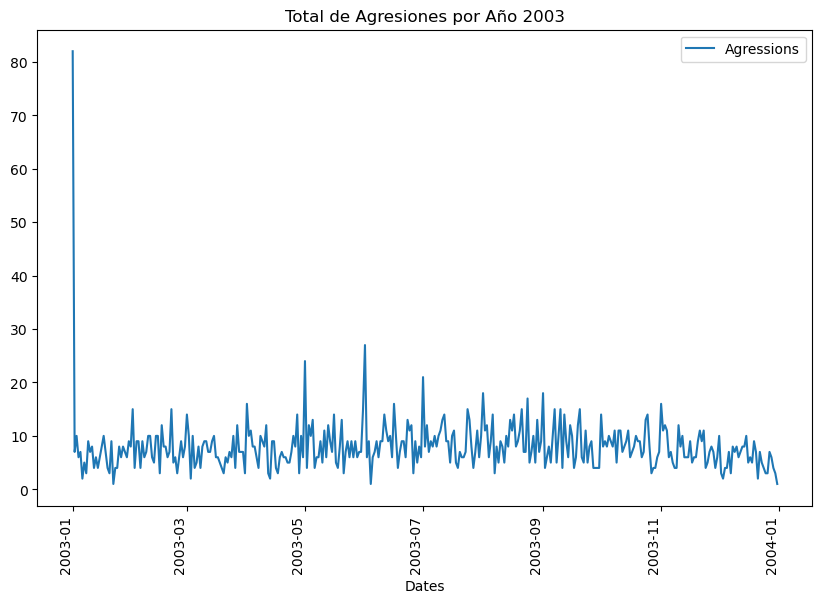

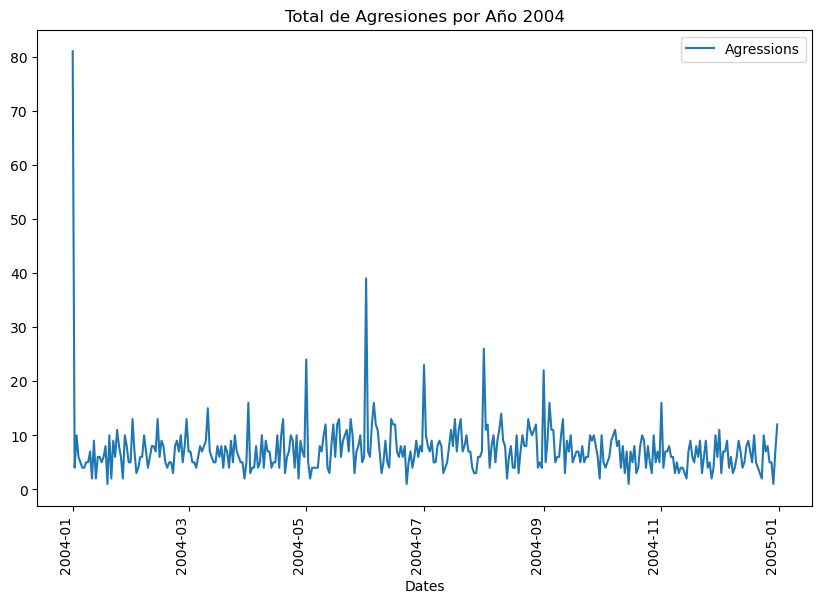

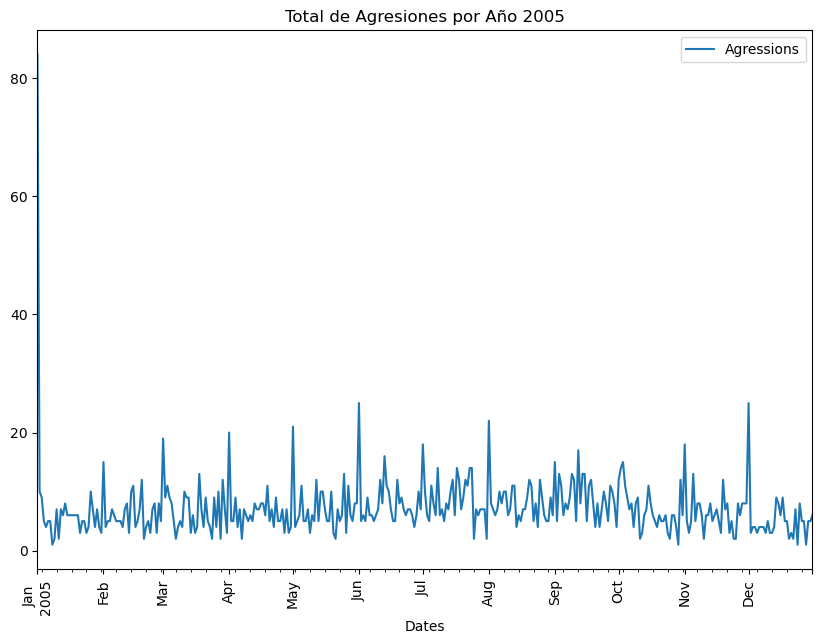

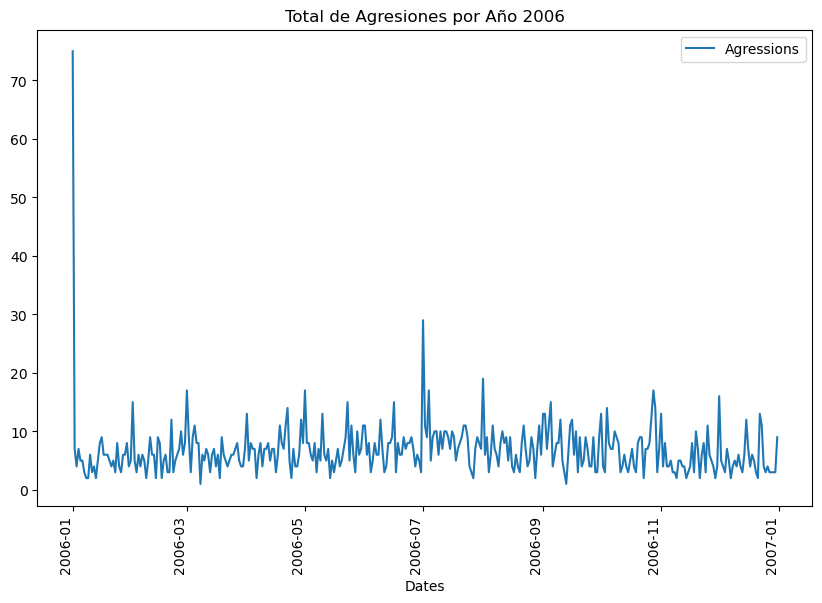

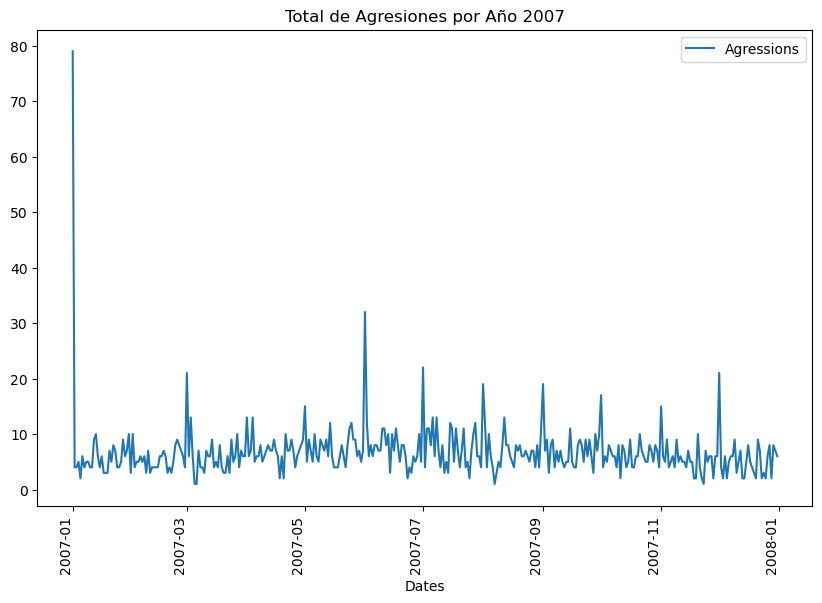

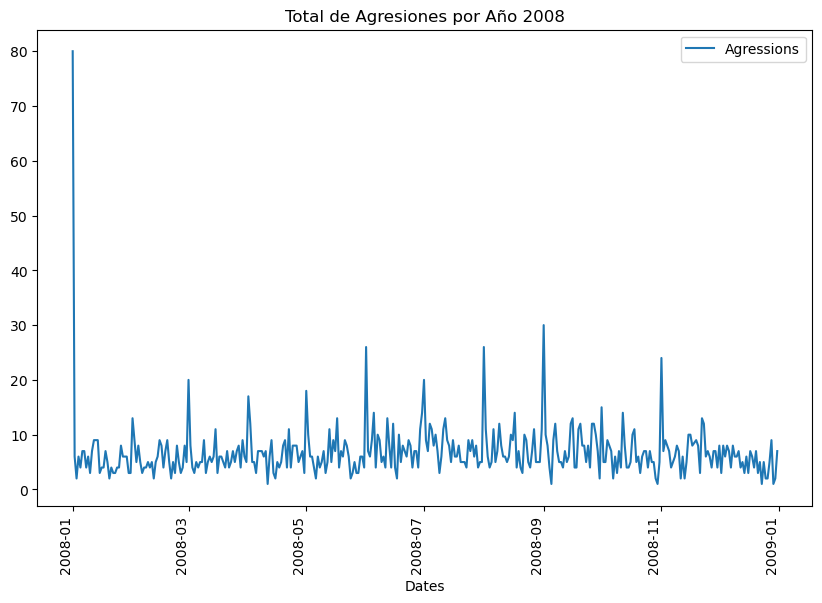

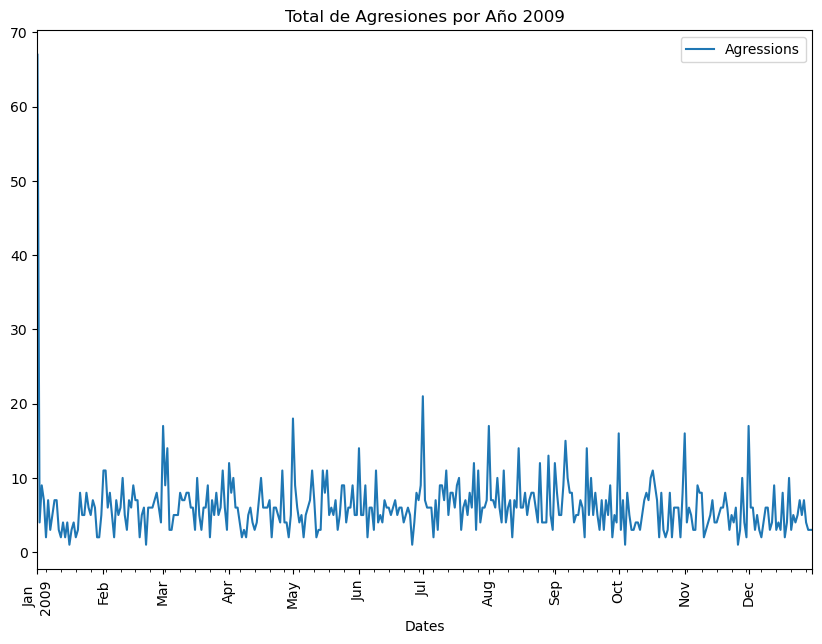

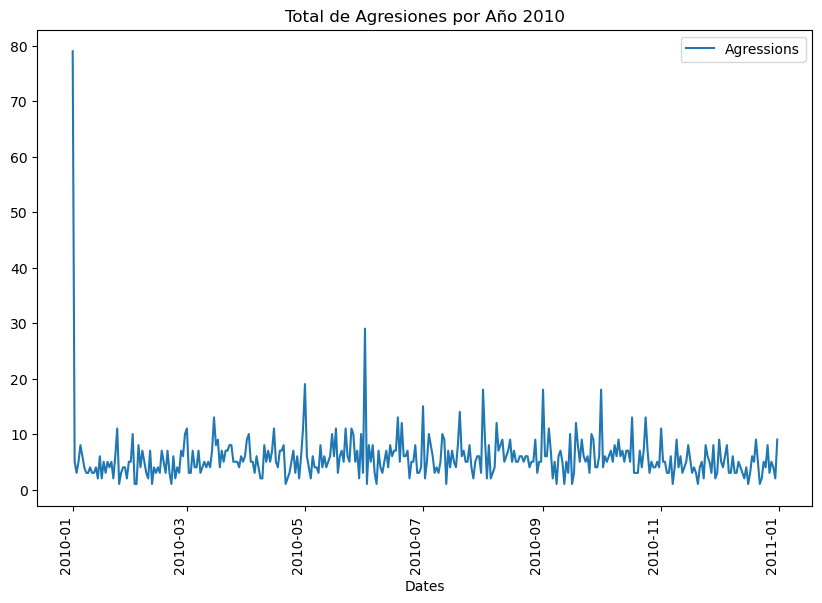

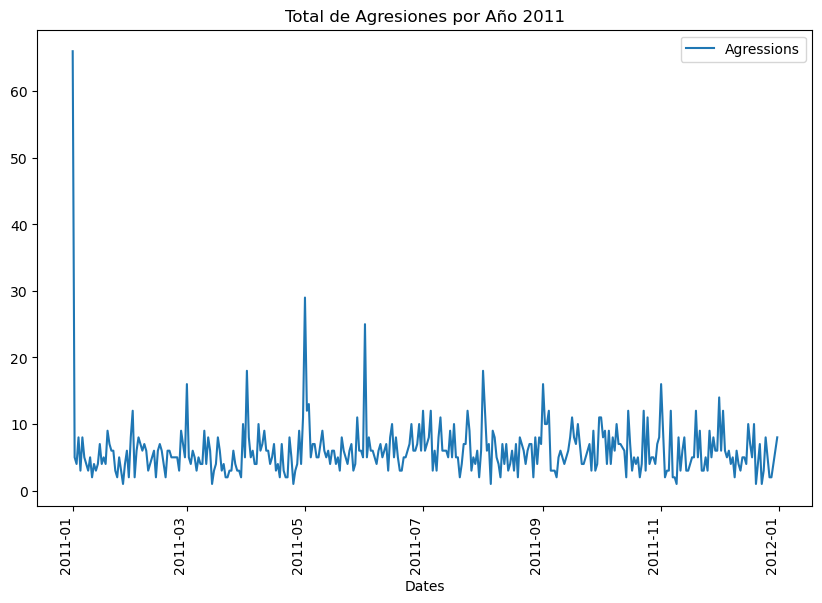

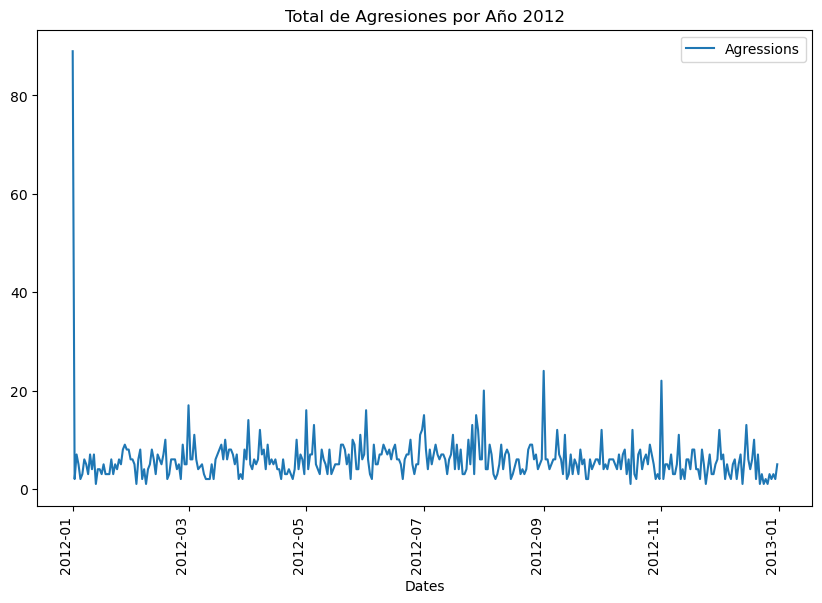

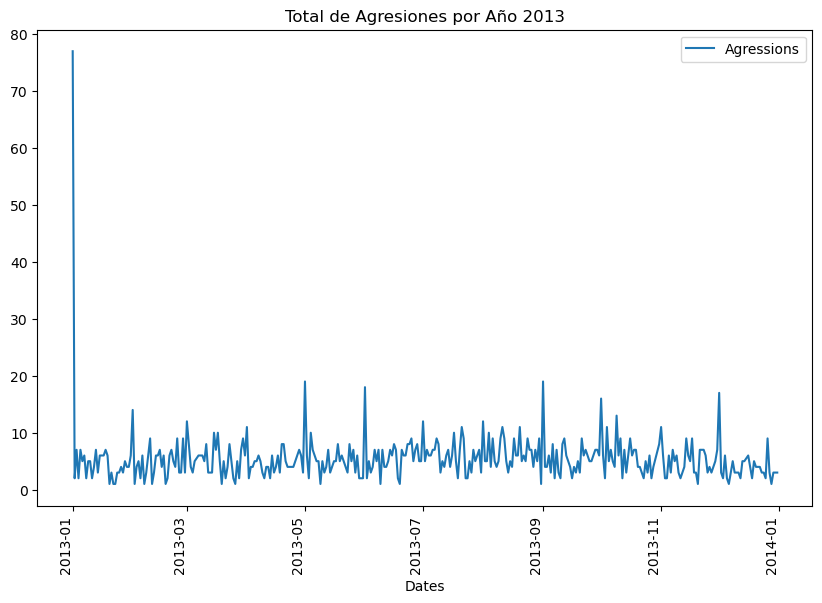

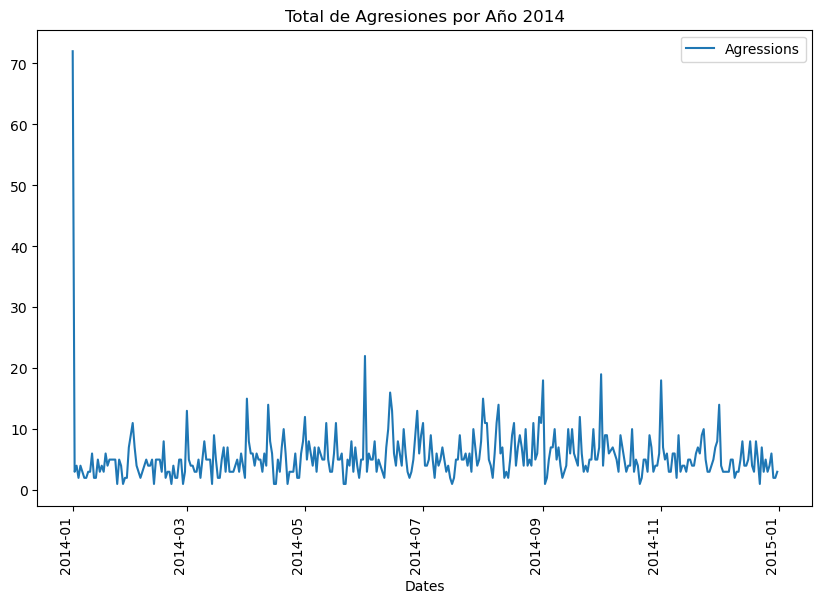

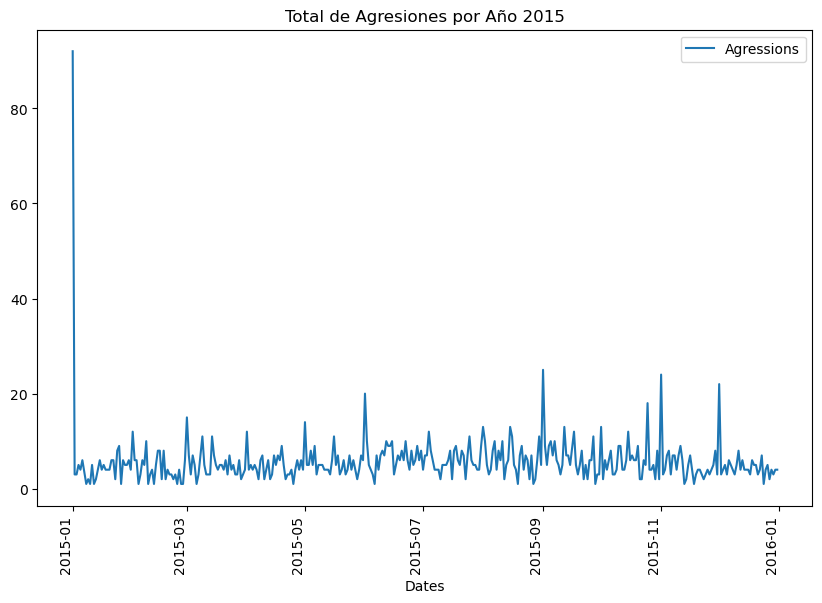

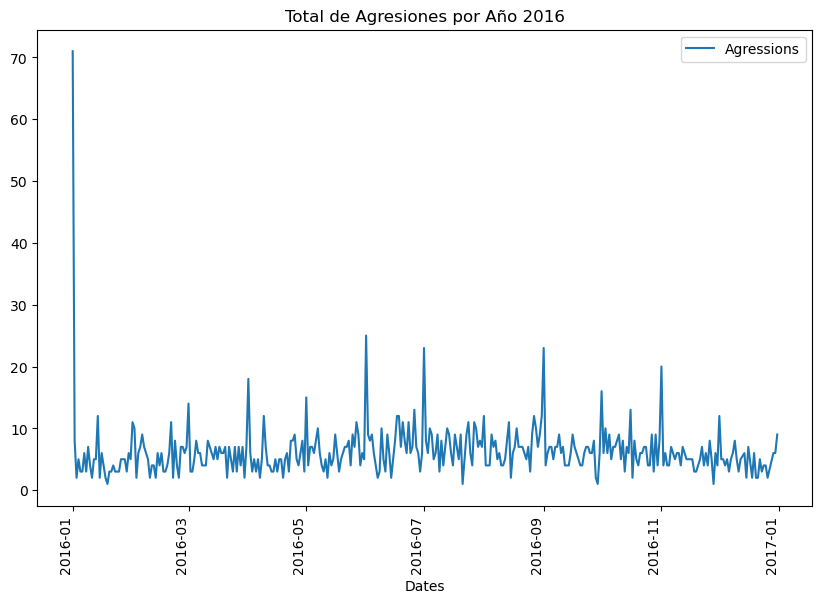

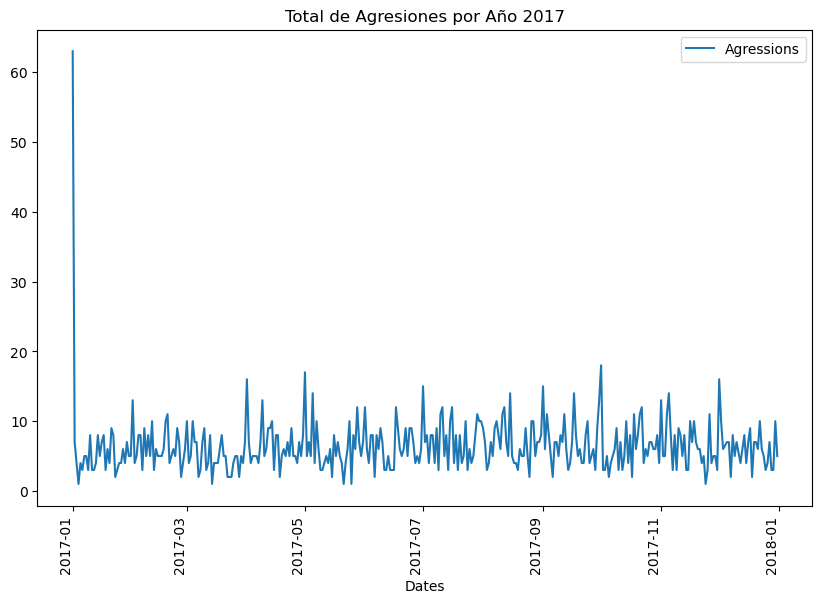

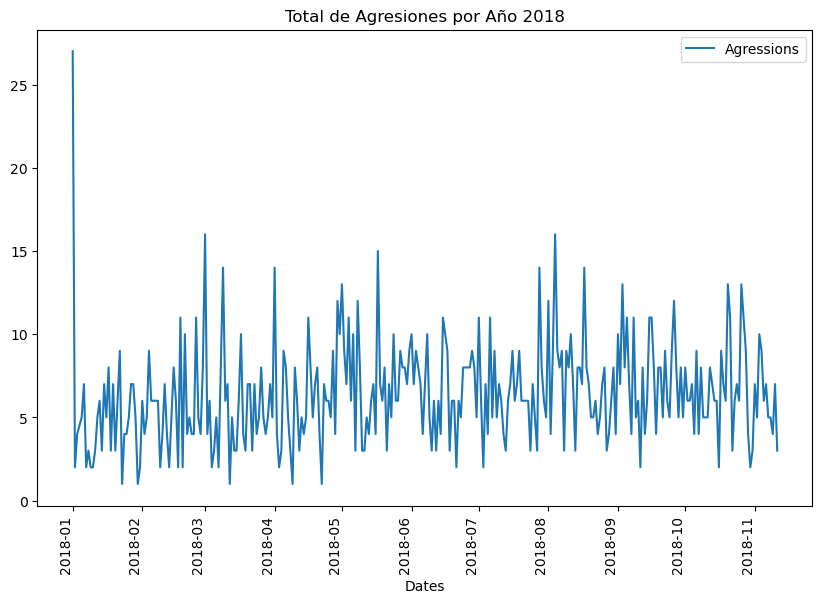

In [16]:
for i in all_years:
    df_year = new_df[new_df.index.year == i]
    title = f"Total de Agresiones por Año {i}"
    ax = df_year.plot(rot=90, figsize=(10, 7))
    ax.set_title(title)
    plt.show()


Como se puede observar, el dia 1 de cada mes hay un pico muy intenso

## MAPS

### Zona de Chicago

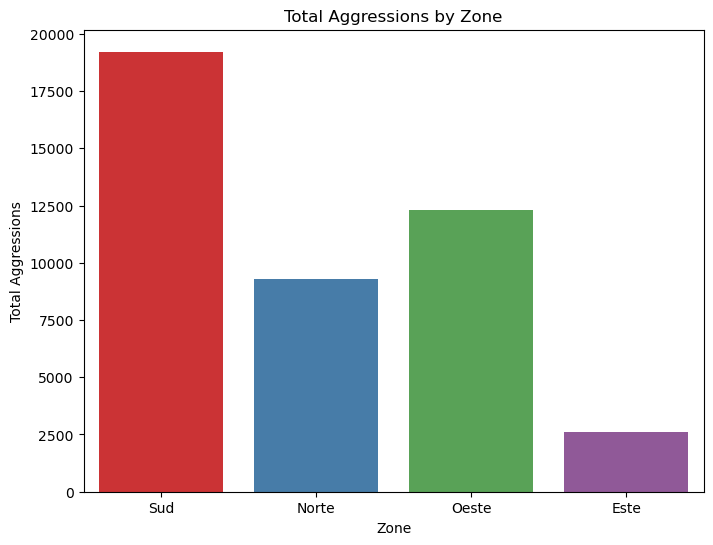

In [17]:
zone_mapping = {
    'N' : 'Norte',
    'S' : 'Sud',
    'E' : 'Este',
    'W' : 'Oeste'
}
filtered_df['zone'] = filtered_df.Block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

plt.figure(figsize=(8, 6))
sns.countplot(x='zone', data=filtered_df, palette='Set1')

# Añade etiquetas y título
plt.xlabel('Zone')
plt.ylabel('Total Aggressions')
plt.title('Total Aggressions by Zone')

# Muestra la gráfica
plt.show()

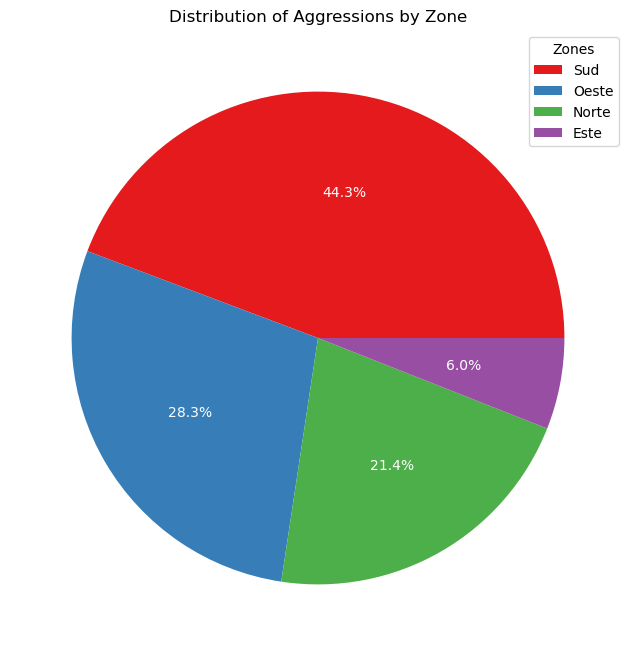

In [18]:
agg_by_zone = filtered_df['zone'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(agg_by_zone, labels=agg_by_zone.index, autopct='%1.1f%%', colors=sns.color_palette('Set1'), textprops={'color': 'white'})
plt.legend(agg_by_zone.index, title='Zones', loc='upper right')
plt.title('Distribution of Aggressions by Zone')
plt.show()

### Zona horaria

In [19]:
def determinar_horario(row):
    if (row['Dates'].month in [1, 2, 3, 5, 6, 7, 8, 10, 11, 12] and
        (7 <= row['Hour'] < 20 or (row['Hour'] == 20 and row['Minute'] == 0))):  # Horario diurno
        return 'diurno'
    else:
        return 'nocturno'

In [20]:
filtered_df['Hour'] = filtered_df['Time'].apply(lambda x: x.hour)
filtered_df['Minute'] = filtered_df['Time'].apply(lambda x: x.minute)

# Filtra las filas donde la hora y los minutos no son 00:00
h_df = filtered_df[~((filtered_df['Hour'] == 0) & (filtered_df['Minute'] == 0))]

# Filtra las filas donde la hora y los minutos no son 00:01
h_df = filtered_df[~((filtered_df['Hour'] == 0) & (filtered_df['Minute'] == 1))]

filtered_df['horario'] = filtered_df.apply(determinar_horario, axis=1)

filtered_df = filtered_df.drop(['Hour', 'Minute'], axis=1)

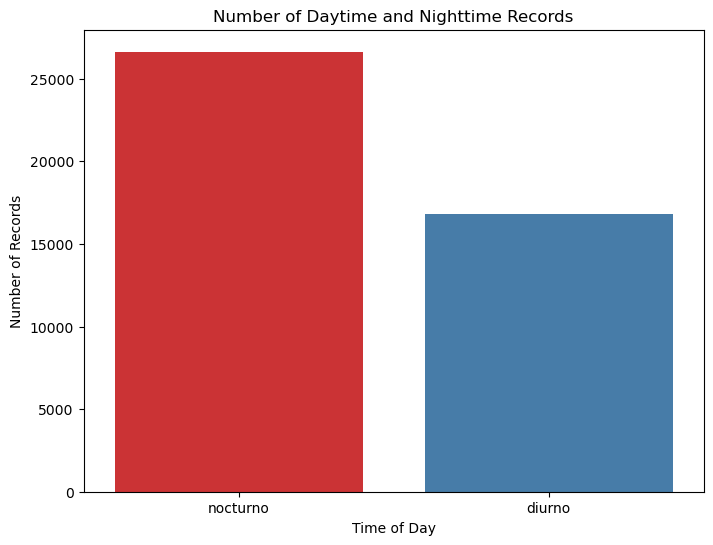

In [21]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='horario', data=filtered_df, palette='Set1')

# Add labels and title
plt.xlabel('Time of Day')
plt.ylabel('Number of Records')
plt.title('Number of Daytime and Nighttime Records')
plt.show()

### MAPAS

In [22]:
def secure_lmplot(data, x_col, y_col, hue_col, marker_style, marker_size, palette, map_type):
    secure_data = data.copy()
    if map_type == 1:
        secure_title = "Crimes by District"
    else:
        secure_title = "Crimes by Type"
    sns.lmplot(x=x_col, y=y_col, data=secure_data, fit_reg=False, hue=hue_col, palette=palette,
               height=12, ci=2, scatter_kws={"marker": marker_style, "s": marker_size})
    plt.title(secure_title)
    plt.show()


/Users/oscar_sanchez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


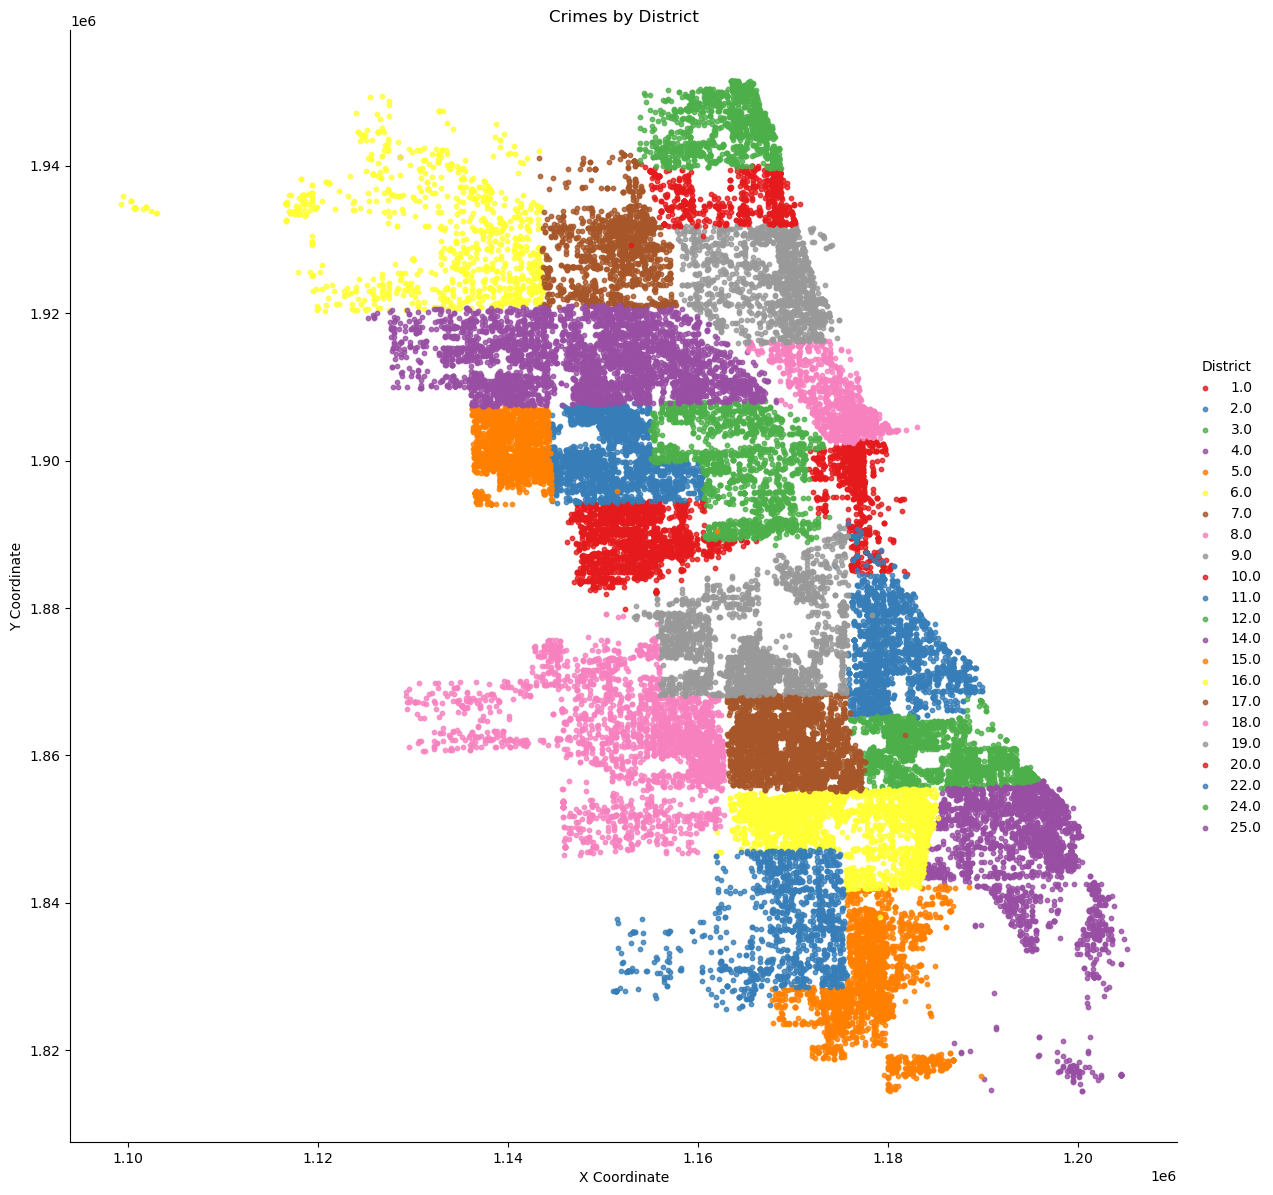

/Users/oscar_sanchez/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


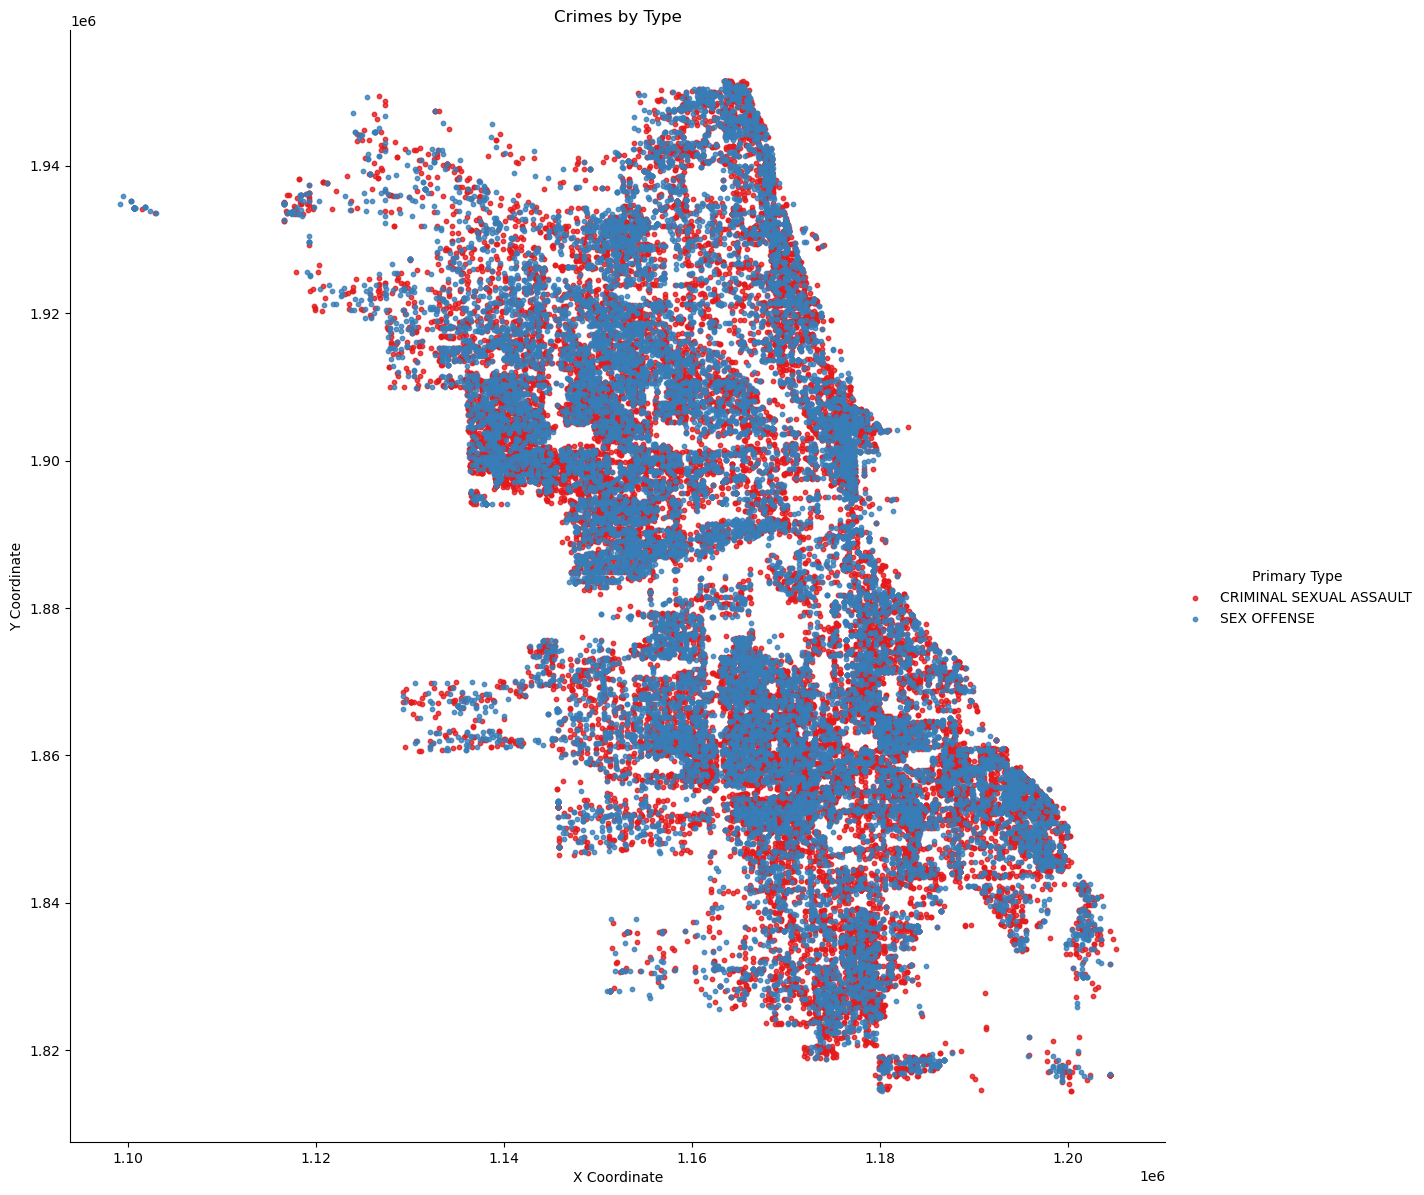

In [23]:
# Example usage
new_crimes_data = filtered_df.loc[(filtered_df['X Coordinate'] != 0)]
secure_lmplot(data=new_crimes_data, x_col='X Coordinate', y_col='Y Coordinate',
              hue_col='District', marker_style="D", marker_size=10, palette='Set1',map_type=1)

secure_lmplot(data=new_crimes_data, x_col='X Coordinate', y_col='Y Coordinate',
              hue_col='Primary Type', marker_style="D", marker_size=10, palette='Set1',map_type=2)

# Variables exogens

In [24]:
def convert_dataset(df,num):
    df = df.set_index('Unnamed: 0')
    df.drop(columns=df.columns[:num],axis=1, inplace=True)
    df['Area'] = np.nan
    df = df.reset_index()
    df.dropna(axis = 0, how = 'all', inplace = True)
    df = df.set_index('Unnamed: 0')

    num = 1
    indx=0
    for i in df.index:
        s = str(num)
        if s in i or i == 'Chicago':
            df['Area'].iloc[indx] = s
            nom = s
            num+=1
        else:
            df['Area'].iloc[indx] = nom
        indx+=1

    df = df.groupby(['Area', 'Unnamed: 0']).first()
    df.dropna(axis = 0, how = 'all', inplace = True)

    return df

#features sin varaibles diarias para las predicciones mensuales
def features (data):
    
    df = data.copy()
        
    # Time features
    df['year'] = df.index.year.astype('int')
    df['quarter'] = df.index.quarter.astype('int')
    df['month'] = df.index.month.astype('int')
    df['primavera'] = df.month.apply(lambda x: 1 if x in (3,4,5) else 0)
    df['estiu'] = df.month.apply(lambda x: 1 if x in (6,7,8) else 0)
    df['tardor'] = df.month.apply(lambda x: 1 if x in (9,10,11) else 0)
    df['hivern'] = df.month.apply(lambda x: 1 if x in (12,1,2) else 0)

        
    # Dummy features
    df = pd.get_dummies(df, columns=['year'], drop_first=True)
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True)
    

    # DeterministicProcess
    fourierA = CalendarFourier(freq='A', order=5)
    fourierM = CalendarFourier(freq='M', order=2)
    fourierW = CalendarFourier(freq='W', order=4)
    dp = DeterministicProcess(index=df.index,
                          order=1,
                          seasonal=False,
                          constant=False,
                          additional_terms=[fourierA, fourierM, fourierW],
                          drop=True)
    dp_df = dp.in_sample()
    df = pd.concat([df, dp_df], axis=1)
    
        
    return df

## Pobreza

In [25]:
poverty = pd.read_excel('/Users/oscar_sanchez/Desktop/TFG/CHICAGO/src/variables_exogenas/poverty.xlsx')

In [26]:
poverty = convert_dataset(poverty,3)

In [27]:
poverty.head(10)

2000     2008-2012  2009-2013  \
Area Unnamed: 0                                                               
1    Income below poverty level          12993.000  14833.000000  15065.000   
     Percent income below poverty level      0.213      0.269299      0.277   
     Total                               60962.000  55080.000000  54455.000   
10   Income below poverty level           1611.000   1938.000000   2136.000   
     Percent income below poverty level      0.043      0.052505      0.059   
     Total                               37125.000  36911.000000  36492.000   
11   Income below poverty level           1270.000   1871.000000   2078.000   
     Percent income below poverty level      0.049      0.070133      0.077   
     Total                               25832.000  26678.000000  27110.000   
12   Income below poverty level            463.000   1267.000000   1158.000   

                                            2010-2014  2011-2015  2012-2016  \
Area Unnamed: 0                                                               
1    Income below poverty level          14173.000000   13487.00  13888.000   
     Percent income below poverty level      0.271956       0.26      0.265   
     Total                               52115.000000   51270.00  52328.000   
10   Income below poverty level           2150.000000    2203.00   2337.000   
     Percent income below poverty level      0.059755       0.06      0.066   
     Total                               35980.000000   35600.00  35508.000   
11   Income below poverty level           2383.000000    2560.00   2296.000   
     Percent income below poverty level      0.088502       0.09      0.086   
     Total                               26926.000000   27207.00  26746.000   
12   Income below poverty level            920.000000     781.00    752.000   

                                         2013-2017  2014-2018  2015-2019  \
Area Unnamed: 0                                                            
1    Income below poverty level          13576.000  13378.000  13343.000   
     Percent income below poverty level      0.262      0.259      0.255   
     Total                               51834.000  51681.000  52307.000   
10   Income below poverty level           2190.000   2231.000   2590.000   
     Percent income below poverty level      0.060      0.061      0.069   
     Total                               36393.000  36623.000  37370.000   
11   Income below poverty level           2098.000   2700.000   2639.000   
     Percent income below poverty level      0.078      0.097      0.096   
     Total                               26760.000  27880.000  27395.000   
12   Income below poverty level            835.000    888.000    933.000   

                                         2016-2020  
Area Unnamed: 0                                     
1    Income below poverty level          11310.000  
     Percent income below poverty level      0.216  
     Total                               52439.000  
10   Income below poverty level           2611.000  
     Percent income below poverty level      0.070  
     Total                               37533.000  
11   Income below poverty level           2184.000  
     Percent income below poverty level      0.081  
     Total                               27091.000  
12   Income below poverty level            809.000

## Alojamiento

In [28]:
housing = pd.read_excel('/Users/oscar_sanchez/Desktop/TFG/CHICAGO/src/variables_exogenas/housing.xlsx')

In [29]:
housing = convert_dataset(housing,7)

In [30]:
housing.head(10)

2000     2008-2012  2009-2013  \
Area Unnamed: 0                                                      
1    Owner occupied           4688.000000   6995.000000   6748.000   
     Percent owner occupied      0.183577      0.291689      0.281   
     Renter occupied         20849.000000  16986.000000  17256.000   
     Total                   25537.000000  23981.000000  24004.000   
10   Owner occupied          12373.000000  11624.000000  11353.000   
     Percent owner occupied      0.801360      0.793664      0.791   
     Renter occupied          3067.000000   3022.000000   3003.000   
     Total                   15440.000000  14646.000000  14356.000   
11   Owner occupied           7020.000000   6535.000000   6439.000   
     Percent owner occupied      0.668826      0.657246      0.650   

                                2010-2014  2011-2015  2012-2016  2013-2017  \
Area Unnamed: 0                                                              
1    Owner occupied           6206.000000    5925.00   5793.000   5746.000   
     Percent owner occupied      0.264231       0.25      0.239      0.239   
     Renter occupied         17281.000000   17895.00  18465.000  18342.000   
     Total                   23487.000000   23820.00  24258.000  24088.000   
10   Owner occupied          11579.000000   11511.00  11380.000  11446.000   
     Percent owner occupied      0.807912       0.81      0.787      0.776   
     Renter occupied          2753.000000    2734.00   3076.000   3304.000   
     Total                   14332.000000   14245.00  14456.000  14750.000   
11   Owner occupied           6419.000000    6341.00   6368.000   6559.000   
     Percent owner occupied      0.634602       0.62      0.620      0.633   

                             2014-2018  2015-2019  2016-2020  
Area Unnamed: 0                                               
1    Owner occupied           6064.000   6091.000   6518.000  
     Percent owner occupied      0.250      0.245      0.262  
     Renter occupied         18218.000  18741.000  18398.000  
     Total                   24282.000  24832.000  24916.000  
10   Owner occupied          11591.000  11194.000  11141.000  
     Percent owner occupied      0.774      0.745      0.754  
     Renter occupied          3385.000   3826.000   3628.000  
     Total                   14976.000  15020.000  14769.000  
11   Owner occupied           6750.000   6816.000   6908.000  
     Percent owner occupied      0.642      0.657      0.657

## Educación

In [31]:
education = pd.read_excel('/Users/oscar_sanchez/Desktop/TFG/CHICAGO/src/variables_exogenas/education.xlsx')

In [32]:
education = convert_dataset(education,6)

In [33]:
education.head(10)

2000     2008-2012  2009-2013  \
Area Unnamed: 0                                                           
1    BA or Higher                 12355.000000  15195.000000  15360.000   
     High School Graduate Only     7607.000000   6738.000000   6827.000   
     Not HS Graduate               9835.000000   6832.000000   6600.000   
     Percent HS Grad or Higher        0.745570      0.818399      0.825   
     Percent with a BA or Higher      0.319622      0.403897      0.408   
     Some College                  8858.000000   8856.000000   8873.000   
     Total                        38655.000000  37621.000000  37660.000   
10   BA or Higher                  7035.000000   8559.000000   8559.000   
     High School Graduate Only     8347.000000   7519.000000   7383.000   
     Not HS Graduate               4941.000000   3151.000000   2625.000   

                                     2010-2014  2011-2015  2012-2016  \
Area Unnamed: 0                                                        
1    BA or Higher                 15517.000000   15502.00  16320.000   
     High School Graduate Only     7150.000000    6998.00   7175.000   
     Not HS Graduate               6089.000000    5862.00   5708.000   
     Percent HS Grad or Higher        0.835907       0.84      0.850   
     Percent with a BA or Higher      0.418169       0.42      0.429   
     Some College                  8351.000000    8667.00   8811.000   
     Total                        37107.000000   37029.00  38014.000   
10   BA or Higher                  9086.000000    9484.00   9692.000   
     High School Graduate Only     7286.000000    6795.00   6953.000   
     Not HS Graduate               2202.000000    2100.00   2094.000   

                                  2013-2017   2014-2018  2015-2019  2016-2020  
Area Unnamed: 0                                                                
1    BA or Higher                 16146.000  17084.0000   17307.00  18083.000  
     High School Graduate Only     7689.000   7464.0000    7418.00   6901.000  
     Not HS Graduate               5231.000   4906.0000    4658.00   4480.000  
     Percent HS Grad or Higher        0.863      0.8708       0.88      0.883  
     Percent with a BA or Higher      0.424      0.4501       0.45      0.472  
     Some College                  9014.000   8505.0000    8729.00   8859.000  
     Total                        38080.000  37959.0000   38112.00  38323.000  
10   BA or Higher                 10334.000  10894.0000   11002.00  11680.000  
     High School Graduate Only     7088.000   7361.0000    7413.00   7448.000  
     Not HS Graduate               2090.000   2078.0000    2227.00   2027.000

In [34]:
#Exogenes
ed = education.reset_index()
ed.Area = ed.Area.astype('int')
hou = housing.reset_index()
hou.Area = hou.Area.astype('int')
pov = poverty.reset_index()
pov.Area = pov.Area.astype('int')

## NEW DAYS

In [35]:
#new_df total dies

x = pd.DataFrame()
x = df_crimes.groupby(df_crimes.Dates).first().reset_index()
x = x['Dates']

new_df_dies = filtered_df.groupby(df_crimes.Dates).size().reset_index()
new_df_dies = pd.merge(x.to_frame(), new_df_dies, how='left')

new_df_dies = new_df_dies.fillna(0)
new_df_dies = new_df_dies.rename(columns = {0:'Agressions'}).set_index('Dates')
new_df_dies.index = pd.to_datetime(new_df_dies.index)
new_df_dies['New Years'] = 0
new_df_dies.loc[(new_df_dies.index.day == 1) & (new_df_dies.index.month == 1), 'New Years'] = 1

#new_df total dies pred
new_df_dies.iloc[-14:].Agressions = np.nan

# Adding lags
for l in range(1,5):
    new_df_dies[f'agressions_lag_{l}'] = new_df_dies['Agressions'].shift(l)
    new_df_dies[f'agressions_lag_{l}'] = new_df_dies[f'agressions_lag_{l}'].fillna(0)

#mitjanes
new_df_dies['agressions_week_avg'] = new_df_dies['Agressions'].rolling(7).mean()
new_df_dies['agressions_biweek_avg'] = new_df_dies['Agressions'].rolling(14).mean()
new_df_dies['agressions_1_month_avg'] = new_df_dies['Agressions'].rolling(30).mean()
new_df_dies['agressions_2_month_avg'] = new_df_dies['Agressions'].rolling(60).mean()

new_df_dies['agressions_week_avg'] = new_df_dies['agressions_week_avg'].fillna(0)
new_df_dies['agressions_biweek_avg'] = new_df_dies['agressions_biweek_avg'].fillna(0)
new_df_dies['agressions_1_month_avg'] = new_df_dies['agressions_1_month_avg'].fillna(0)
new_df_dies['agressions_2_month_avg'] = new_df_dies['agressions_2_month_avg'].fillna(0)

new_df_dies = features(new_df_dies)

new_df_dies

Agressions  New Years  agressions_lag_1  agressions_lag_2  \
Dates                                                                   
2001-01-01       100.0          1               0.0               0.0   
2001-01-02         5.0          0             100.0               0.0   
2001-01-03        11.0          0               5.0             100.0   
2001-01-04         3.0          0              11.0               5.0   
2001-01-05         8.0          0               3.0              11.0   
...                ...        ...               ...               ...   
2018-11-07         5.0          0               7.0               6.0   
2018-11-08         5.0          0               5.0               7.0   
2018-11-09         4.0          0               5.0               5.0   
2018-11-10         7.0          0               4.0               5.0   
2018-11-11         3.0          0               7.0               4.0   

            agressions_lag_3  agressions_lag_4  agressions_week_avg  \
Dates                                                                 
2001-01-01               0.0               0.0             0.000000   
2001-01-02               0.0               0.0             0.000000   
2001-01-03               0.0               0.0             0.000000   
2001-01-04             100.0               0.0             0.000000   
2001-01-05               5.0             100.0             0.000000   
...                      ...               ...                  ...   
2018-11-07               9.0              10.0             7.000000   
2018-11-08               6.0               9.0             6.714286   
2018-11-09               7.0               6.0             6.571429   
2018-11-10               5.0               7.0             6.142857   
2018-11-11               5.0               5.0             5.285714   

            agressions_biweek_avg  agressions_1_month_avg  \
Dates                                                       
2001-01-01               0.000000                0.000000   
2001-01-02               0.000000                0.000000   
2001-01-03               0.000000                0.000000   
2001-01-04               0.000000                0.000000   
2001-01-05               0.000000                0.000000   
...                           ...                     ...   
2018-11-07               6.928571                6.766667   
2018-11-08               6.857143                6.766667   
2018-11-09               6.214286                6.733333   
2018-11-10               5.928571                6.800000   
2018-11-11               5.500000                6.633333   

            agressions_2_month_avg  ...  sin(1,freq=M)  cos(1,freq=M)  \
Dates                               ...                                 
2001-01-01                0.000000  ...       0.000000       1.000000   
2001-01-02                0.000000  ...       0.201299       0.979530   
2001-01-03                0.000000  ...       0.394356       0.918958   
2001-01-04                0.000000  ...       0.571268       0.820763   
2001-01-05                0.000000  ...       0.724793       0.688967   
...                            ...  ...            ...            ...   
2018-11-07                6.800000  ...       0.951057       0.309017   
2018-11-08                6.800000  ...       0.994522       0.104528   
2018-11-09                6.766667  ...       0.994522      -0.104528   
2018-11-10                6.850000  ...       0.951057      -0.309017   
2018-11-11                6.766667  ...       0.866025      -0.500000   

            sin(2,freq=M)  cos(2,freq=M)  sin(1,freq=W-SUN)  \
Dates                                                         
2001-01-01       0.000000       1.000000           0.000000   
2001-01-02       0.394356       0.918958           0.781831   
2001-01-03       0.724793       0.688967           0.974928   
2001-01-04       0.937752       0.347305           0.433884   
2001-01-05      

## New Mesos

In [36]:
df_crimes['month_year'] = pd.to_datetime(df_crimes.Dates).dt.to_period('M')

new_df_mesos = filtered_df.groupby([df_crimes['month_year']]).size().to_frame()
new_df_mesos = new_df_mesos.rename(columns = {0:'Agressions'})

new_df_mesos = new_df_mesos.iloc[:-2]
new_df_mesos.iloc[-6:] = np.nan

#Cap d'any
new_df_mesos['New Years'] = 0
new_df_mesos.loc[(new_df_mesos.index.month == 1), 'New Years'] = 1

#mitjanes
new_df_mesos['agressions_2_month_avg'] = new_df_mesos['Agressions'].rolling(2).mean()
new_df_mesos['agressions_6_month_avg'] = new_df_mesos['Agressions'].rolling(6).mean()

new_df_mesos['agressions_2_month_avg'] = new_df_mesos['agressions_2_month_avg'].fillna(0)
new_df_mesos['agressions_6_month_avg'] = new_df_mesos['agressions_6_month_avg'].fillna(0)

#lags
for l in range(1,5):
    new_df_mesos[f'agressions_lag_{l}'] = new_df_mesos['Agressions'].shift(l)
    new_df_mesos[f'agressions_lag_{l}'] = new_df_mesos[f'agressions_lag_{l}'].fillna(0)

new_df_mesos = features(new_df_mesos)

new_df_mesos

Agressions  New Years  agressions_2_month_avg  \
month_year                                                  
2001-01          318.0          1                     0.0   
2001-02          223.0          0                   270.5   
2001-03          264.0          0                   243.5   
2001-04          222.0          0                   243.0   
2001-05          282.0          0                   252.0   
...                ...        ...                     ...   
2018-05            NaN          0                     0.0   
2018-06            NaN          0                     0.0   
2018-07            NaN          0                     0.0   
2018-08            NaN          0                     0.0   
2018-09            NaN          0                     0.0   

            agressions_6_month_avg  agressions_lag_1  agressions_lag_2  \
month_year                                                               
2001-01                        0.0               0.0               0.0   
2001-02                        0.0             318.0               0.0   
2001-03                        0.0             223.0             318.0   
2001-04                        0.0             264.0             223.0   
2001-05                        0.0             222.0             264.0   
...                            ...               ...               ...   
2018-05                        0.0               0.0             175.0   
2018-06                        0.0               0.0               0.0   
2018-07                        0.0               0.0               0.0   
2018-08                        0.0               0.0               0.0   
2018-09                        0.0               0.0               0.0   

            agressions_lag_3  agressions_lag_4  month  primavera  ...  \
month_year                                                        ...   
2001-01                  0.0               0.0      1          0  ...   
2001-02                  0.0               0.0      2          0  ...   
2001-03                  0.0               0.0      3          1  ...   
2001-04                318.0               0.0      4          1  ...   
2001-05                223.0             318.0      5          1  ...   
...                      ...               ...    ...        ...  ...   
2018-05                156.0             155.0      5          1  ...   
2018-06                175.0             156.0      6          0  ...   
2018-07                  0.0             175.0      7          0  ...   
2018-08                  0.0               0.0      8          0  ...   
2018-09                  0.0               0.0      9          0  ...   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
month_year                                                            
2001-01              1.000000           0.000000           1.000000   
2001-02             -0.534373           0.455907          -0.890028   
2001-03             -0.605056          -0.933837           0.357698   
2001-04              0.996298           0.994218           0.107381   
2001-05             -0.397543          -0.785650          -0.618671   
...                       ...                ...                ...   
2018-05             -0.397543          -0.785650          -0.618671   
2018-06             -0.563151           0.417194           0.908818   
2018-07              0.994671           0.128748          -0.991677   
2018-08             -0.444378          -0.566702           0.823923   
2018-09             -0.519744           0.880012          -0.474951   

            cos(1,freq=M)  sin(1,freq=W-SUN)  cos(1,freq=W-SUN)  \
month_year                                                        
2001-01               1.0           0.000000           1.000000   
2001-02               1.0           0.433884          -0.900969   
2001-03               1.0           0.433884          -0.900969   
2001-04               1.0          -0.781831  

## Community Dies

In [37]:
#community dies
community_dies = filtered_df.groupby([df_crimes.Dates, df_crimes['Community Area']]).count().unstack(fill_value=0).stack()

community_dies = community_dies.iloc[:, :-24]
community_dies = community_dies.rename(columns = {'ID':'Agressions'})

#exemple de dataset fet per data i ward
community_dies= community_dies.reset_index().set_index('Dates')
community_dies.index = pd.to_datetime(community_dies.index)

#Cap d'Any
community_dies = community_dies[community_dies['Community Area'] != 0]
community_dies.loc[(community_dies.index.day == 1) & (community_dies.index.month == 1), 'New Years'] = 1

#Pred
community_dies.iloc[-1078:].Agressions = np.nan

#lags
for l in range(1,5):
    for i in community_dies['Community Area'].unique():
        community_dies.loc[community_dies['Community Area'] == i, f'agressions_lag_{l}'] = community_dies.loc[community_dies['Community Area'] == i].Agressions.shift(l)
    community_dies[f'agressions_lag_{l}'] = community_dies[f'agressions_lag_{l}'].fillna(0)


#mitjanes
for i in community_dies['Community Area'].unique():
    community_dies.loc[community_dies['Community Area'] == i, 'agressions_community_1_month_avg'] = community_dies[community_dies['Community Area'] == i].Agressions.rolling(30).mean().fillna(0)
    community_dies.loc[community_dies['Community Area'] == i, 'agressions_community_2_month_avg'] = community_dies[community_dies['Community Area'] == i].Agressions.rolling(60).mean().fillna(0)

community_dies = features(community_dies)

community_dies = community_dies.loc[community_dies.index.year >=2017]

community_dies

Community Area  Agressions  New Years  agressions_lag_1  \
Dates                                                                 
2017-01-01             1.0           2        1.0               1.0   
2017-01-01             2.0           0        1.0               0.0   
2017-01-01             3.0           2        1.0               0.0   
2017-01-01             4.0           0        1.0               0.0   
2017-01-01             5.0           0        1.0               0.0   
...                    ...         ...        ...               ...   
2018-11-11            73.0           0        NaN               0.0   
2018-11-11            74.0           0        NaN               0.0   
2018-11-11            75.0           0        NaN               0.0   
2018-11-11            76.0           0        NaN               0.0   
2018-11-11            77.0           0        NaN               0.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  \
Dates                                                              
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
...                      ...               ...               ...   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               1.0   

            agressions_community_1_month_avg  \
Dates                                          
2017-01-01                          0.166667   
2017-01-01                          0.033333   
2017-01-01                          0.200000   
2017-01-01                          0.033333   
2017-01-01                          0.033333   
...                                      ...   
2018-11-11                          0.100000   
2018-11-11                          0.033333   
2018-11-11                          0.033333   
2018-11-11                          0.033333   
2018-11-11                          0.100000   

            agressions_community_2_month_avg  month  ...  sin(1,freq=M)  \
Dates                                                ...                  
2017-01-01                          0.133333      1  ...       0.000000   
2017-01-01                          0.066667      1  ...       0.000000   
2017-01-01                          0.150000      1  ...       0.000000   
2017-01-01                          0.033333      1  ...       0.000000   
2017-01-01                          0.066667      1  ...       0.000000   
...                                      ...    ...  ...            ...   
2018-11-11                          0.100000     11  ...       0.866025   
2018-11-11                          0.033333     11  ...       0.866025   
2018-11-11                          0.050000     11  ...       0.866025   
2018-11-11                          0.033333     11  ...       0.866025   
2018-11-11                          0.116667     11  ...       0.866025   

            cos(1,freq=M)  sin(2,freq=M)  cos(2,freq=M)  sin(1,freq=W-SUN)  \
Dates                                                                        
2017-01-01            1.0       0.000000            1.0          -0.781831   
2017-01-01            1.0       0.000000            1.0          -0.781831   
2017-01-01            1.0       0.000000            1.0          -0.781831   
2017-01-01            1.0       0.000000            1.0          -0.781831   
2017-01-01            1.0       0.000000            1.0          -0.781831   
...                   ...            ...            ... 

# Community Mesos

In [38]:
#community mesos
df_crimes['month_year'] = pd.to_datetime(df_crimes.Dates).dt.to_period('M')

community_mesos = filtered_df.groupby([df_crimes['month_year'], df_crimes['Community Area']]).count().unstack(fill_value=0).stack()
community_mesos = community_mesos.iloc[:, :-24]
community_mesos = community_mesos.rename(columns = {'ID':'Agressions'})
community_mesos= community_mesos.reset_index().set_index('month_year')
community_mesos = community_mesos[community_mesos['Community Area'] != 0]

community_mesos = community_mesos.loc[community_mesos.index.year != 2023]
community_mesos.loc[(community_mesos.index.year == 2022) & (community_mesos.index.month > 6), 'Agressions'] = np. nan
#Cap d'any
community_mesos['New Years'] = 0
community_mesos.loc[(community_mesos.index.month == 1), 'New Years'] = 1

#mitjanes
for i in community_mesos['Community Area'].unique():
    community_mesos.loc[community_mesos['Community Area'] == i, 'agressions_community_2_month_avg'] = community_mesos[community_mesos['Community Area'] == i].Agressions.rolling(2).mean().fillna(0)
    community_mesos.loc[community_mesos['Community Area'] == i, 'agressions_community_6_month_avg'] = community_mesos[community_mesos['Community Area'] == i].Agressions.rolling(6).mean().fillna(0)
    
#lags
for l in range(1,5):
    for i in community_mesos['Community Area'].unique():
        community_mesos.loc[community_mesos['Community Area'] == i, f'agressions_lag_{l}'] = community_mesos.loc[community_mesos['Community Area'] == i].Agressions.shift(l)
    community_mesos[f'agressions_lag_{l}'] = community_mesos[f'agressions_lag_{l}'].fillna(0)
    
community_mesos = features(community_mesos)

community_mesos

Community Area  Agressions  New Years  \
month_year                                          
2001-01                1.0         1.0          1   
2001-01                2.0         0.0          1   
2001-01                3.0         1.0          1   
2001-01                4.0         0.0          1   
2001-01                5.0         0.0          1   
...                    ...         ...        ...   
2018-11               73.0         1.0          0   
2018-11               74.0         0.0          0   
2018-11               75.0         0.0          0   
2018-11               76.0         1.0          0   
2018-11               77.0         1.0          0   

            agressions_community_2_month_avg  \
month_year                                     
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
...                                      ...   
2018-11                                  2.5   
2018-11                                  0.5   
2018-11                                  0.5   
2018-11                                  0.5   
2018-11                                  3.0   

            agressions_community_6_month_avg  agressions_lag_1  \
month_year                                                       
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
...                                      ...               ...   
2018-11                             2.333333               4.0   
2018-11                             0.500000               1.0   
2018-11                             1.833333               1.0   
2018-11                             1.000000               0.0   
2018-11                             2.833333               5.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  month  ...  \
month_year                                                               ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
...                      ...               ...               ...    ...  ...   
2018-11                  1.0               1.0               2.0     11  ...   
2018-11                  1.0               0.0               0.0     11  ...   
2018-11                  4.0               0.0               3.0     11  ...   
2018-11                  2.0               2.0               0.0     11  ...   
2018-11                  2.0               2.0               5.0     11  ...   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
month_year                                                            
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
...                       ...                ...                ...   
2018-11             -0.490029           0.858764           0.512371   
2018-11             -0.490029           0.858764           0.512371   
2018-11             -0.490029           0.858764           0.512371   
2018-11         

## AGREGAR VARIABLES EXOGENAS A LOS DATASET

In [39]:
for i in pov.Area.unique():
    area = pov.loc[(pov.Area == i)]
    perc = area.loc[area['Unnamed: 0'] == 'Percent income below poverty level']
    x = float(perc.iloc[0, 2])
    y = float(perc.iloc[0, 11])
    if i != 78:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'Poverty'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'Poverty'] = x
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'Poverty'] = y
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'Poverty'] = y
    else:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'Poverty'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'Poverty'] = x
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'Poverty'] = y
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'Poverty'] = y
        
        
        
idx = 3
year = 2008
while(year<2016): 
    for i in pov.Area.unique():
        area = pov.loc[(pov.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent income below poverty level']
        x = float(x.iloc[0, idx])
        if i != 78:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'Poverty'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'Poverty'] = x
        else:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'Poverty'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'Poverty'] = x
    idx +=1
    year +=1
    

In [40]:
for i in ed.Area.unique():
    area = ed.loc[(ed.Area == i)]
    perc1 = area.loc[area['Unnamed: 0'] == 'Percent HS Grad or Higher']
    perc2 = area.loc[area['Unnamed: 0'] == 'Percent with a BA or Higher']
    x = float(perc1.iloc[0, 2])
    y = float(perc2.iloc[0, 2])
    z = float(perc1.iloc[0, 11])
    h = float(perc2.iloc[0, 11])
    if i !=78:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'HS Grads'] = x
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'BA Grads'] = y
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'HS Grads'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'BA Grads'] = y
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'HS Grads'] = z
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'BA Grads'] = h
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'HS Grads'] = z
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'BA Grads'] = h
    else:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'HS Grads'] = x
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'BA Grads'] = y
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'HS Grads'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'BA Grads'] = y
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'HS Grads'] = z
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'BA Grads'] = h
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'HS Grads'] = z
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'BA Grads'] = h
        
idx = 3
year = 2008
while(year<2016): 
    for i in ed.Area.unique():
        area = ed.loc[(ed.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent HS Grad or Higher']
        y = area.loc[area['Unnamed: 0'] == 'Percent with a BA or Higher']
        x = float(x.iloc[0, idx])
        y = float(y.iloc[0, idx])
        if i !=78:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'HS Grads'] = x
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'BA Grads'] = y
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'HS Grads'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'BA Grads'] = y
        else:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'HS Grads'] = x
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'BA Grads'] = y
            new_df_dies.loc[(new_df_dies.index.year == year), 'HS Grads'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'BA Grads'] = y
    idx +=1
    year +=1
    

In [41]:
for i in hou.Area.unique():
    area = hou.loc[(hou.Area == i)]
    perc = area.loc[area['Unnamed: 0'] == 'Percent owner occupied']
    x = float(perc.iloc[0, 2])
    y = float(perc.iloc[0, 11])
    if i != 78:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'Housing'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'Housing'] = x
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'Housing'] = y
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'Housing'] = y
    else:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'Housing'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'Housing'] = x
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'Housing'] = y
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'Housing'] = y
        
idx = 3
year = 2008
while(year<2016): 
    for i in hou.Area.unique():
        area = hou.loc[(hou.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent owner occupied']
        x = float(x.iloc[0, idx])
        if i != 78:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'Housing'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'Housing'] = x
        else:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'Housing'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'Housing'] = x
    idx +=1
    year +=1

In [42]:
community_mesos

Community Area  Agressions  New Years  \
month_year                                          
2001-01                1.0         1.0          1   
2001-01                2.0         0.0          1   
2001-01                3.0         1.0          1   
2001-01                4.0         0.0          1   
2001-01                5.0         0.0          1   
...                    ...         ...        ...   
2018-11               73.0         1.0          0   
2018-11               74.0         0.0          0   
2018-11               75.0         0.0          0   
2018-11               76.0         1.0          0   
2018-11               77.0         1.0          0   

            agressions_community_2_month_avg  \
month_year                                     
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
...                                      ...   
2018-11                                  2.5   
2018-11                                  0.5   
2018-11                                  0.5   
2018-11                                  0.5   
2018-11                                  3.0   

            agressions_community_6_month_avg  agressions_lag_1  \
month_year                                                       
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
2001-01                             0.000000               0.0   
...                                      ...               ...   
2018-11                             2.333333               4.0   
2018-11                             0.500000               1.0   
2018-11                             1.833333               1.0   
2018-11                             1.000000               0.0   
2018-11                             2.833333               5.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  month  ...  \
month_year                                                               ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
...                      ...               ...               ...    ...  ...   
2018-11                  1.0               1.0               2.0     11  ...   
2018-11                  1.0               0.0               0.0     11  ...   
2018-11                  4.0               0.0               3.0     11  ...   
2018-11                  2.0               2.0               0.0     11  ...   
2018-11                  2.0               2.0               5.0     11  ...   

            sin(1,freq=W-SUN)  cos(1,freq=W-SUN)  sin(2,freq=W-SUN)  \
month_year                                                            
2001-01              0.000000           1.000000           0.000000   
2001-01              0.000000           1.000000           0.000000   
2001-01              0.000000           1.000000           0.000000   
2001-01              0.000000           1.000000           0.000000   
2001-01              0.000000           1.000000           0.000000   
...                       ...                ...                ...   
2018-11              0.433884          -0.900969          -0.781831   
2018-11              0.433884          -0.900969          -0.781831   
2018-11              0.433884          -0.900969          -0.781831   
2018-11         

In [43]:
community_dies

Community Area  Agressions  New Years  agressions_lag_1  \
Dates                                                                 
2017-01-01             1.0           2        1.0               1.0   
2017-01-01             2.0           0        1.0               0.0   
2017-01-01             3.0           2        1.0               0.0   
2017-01-01             4.0           0        1.0               0.0   
2017-01-01             5.0           0        1.0               0.0   
...                    ...         ...        ...               ...   
2018-11-11            73.0           0        NaN               0.0   
2018-11-11            74.0           0        NaN               0.0   
2018-11-11            75.0           0        NaN               0.0   
2018-11-11            76.0           0        NaN               0.0   
2018-11-11            77.0           0        NaN               0.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  \
Dates                                                              
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
...                      ...               ...               ...   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               0.0   
2018-11-11               0.0               0.0               1.0   

            agressions_community_1_month_avg  \
Dates                                          
2017-01-01                          0.166667   
2017-01-01                          0.033333   
2017-01-01                          0.200000   
2017-01-01                          0.033333   
2017-01-01                          0.033333   
...                                      ...   
2018-11-11                          0.100000   
2018-11-11                          0.033333   
2018-11-11                          0.033333   
2018-11-11                          0.033333   
2018-11-11                          0.100000   

            agressions_community_2_month_avg  month  ...  sin(1,freq=W-SUN)  \
Dates                                                ...                      
2017-01-01                          0.133333      1  ...          -0.781831   
2017-01-01                          0.066667      1  ...          -0.781831   
2017-01-01                          0.150000      1  ...          -0.781831   
2017-01-01                          0.033333      1  ...          -0.781831   
2017-01-01                          0.066667      1  ...          -0.781831   
...                                      ...    ...  ...                ...   
2018-11-11                          0.100000     11  ...          -0.781831   
2018-11-11                          0.033333     11  ...          -0.781831   
2018-11-11                          0.050000     11  ...          -0.781831   
2018-11-11                          0.033333     11  ...          -0.781831   
2018-11-11                          0.116667     11  ...          -0.781831   

            cos(1,freq=W-SUN)  sin(2,freq=W-SUN)  cos(2,freq=W-SUN)  \
Dates                                                                 
2017-01-01            0.62349          -0.974928          -0.222521   
2017-01-01            0.62349          -0.974928          -0.222521   
2017-01-01            0.62349          -0.974928          -0.222521   
2017-01-01            0.62349          -0.974928          -0.222521   
2017-01-01            0.62349          -0.974928          -0.222521   
...                       ...                ...     

In [44]:
new_df_mesos

Agressions  New Years  agressions_2_month_avg  \
month_year                                                  
2001-01          318.0          1                     0.0   
2001-02          223.0          0                   270.5   
2001-03          264.0          0                   243.5   
2001-04          222.0          0                   243.0   
2001-05          282.0          0                   252.0   
...                ...        ...                     ...   
2018-05            NaN          0                     0.0   
2018-06            NaN          0                     0.0   
2018-07            NaN          0                     0.0   
2018-08            NaN          0                     0.0   
2018-09            NaN          0                     0.0   

            agressions_6_month_avg  agressions_lag_1  agressions_lag_2  \
month_year                                                               
2001-01                        0.0               0.0               0.0   
2001-02                        0.0             318.0               0.0   
2001-03                        0.0             223.0             318.0   
2001-04                        0.0             264.0             223.0   
2001-05                        0.0             222.0             264.0   
...                            ...               ...               ...   
2018-05                        0.0               0.0             175.0   
2018-06                        0.0               0.0               0.0   
2018-07                        0.0               0.0               0.0   
2018-08                        0.0               0.0               0.0   
2018-09                        0.0               0.0               0.0   

            agressions_lag_3  agressions_lag_4  month  primavera  ...  \
month_year                                                        ...   
2001-01                  0.0               0.0      1          0  ...   
2001-02                  0.0               0.0      2          0  ...   
2001-03                  0.0               0.0      3          1  ...   
2001-04                318.0               0.0      4          1  ...   
2001-05                223.0             318.0      5          1  ...   
...                      ...               ...    ...        ...  ...   
2018-05                156.0             155.0      5          1  ...   
2018-06                175.0             156.0      6          0  ...   
2018-07                  0.0             175.0      7          0  ...   
2018-08                  0.0               0.0      8          0  ...   
2018-09                  0.0               0.0      9          0  ...   

            sin(1,freq=W-SUN)  cos(1,freq=W-SUN)  sin(2,freq=W-SUN)  \
month_year                                                            
2001-01              0.000000           1.000000           0.000000   
2001-02              0.433884          -0.900969          -0.781831   
2001-03              0.433884          -0.900969          -0.781831   
2001-04             -0.781831           0.623490          -0.974928   
2001-05              0.781831           0.623490           0.974928   
...                       ...                ...                ...   
2018-05              0.781831           0.623490           0.974928   
2018-06             -0.433884          -0.900969           0.781831   
2018-07             -0.781831           0.623490          -0.974928   
2018-08              0.974928          -0.222521          -0.433884   
2018-09             -0.974928          -0.222521           0.433884   

            cos(2,freq=W-SUN)  cos(3,freq=W-SUN)  sin(4,freq=W-SUN)  Poverty  \
month_year                                                                     
2001-01              1.000000           1.000000           0.000000    0.196   
2001-02              0.623490          -0.222521          -0.974928    0.196   
2001-03              0.623490          -0.222521          -0.

In [45]:
new_df_dies

Agressions  New Years  agressions_lag_1  agressions_lag_2  \
Dates                                                                   
2001-01-01       100.0          1               0.0               0.0   
2001-01-02         5.0          0             100.0               0.0   
2001-01-03        11.0          0               5.0             100.0   
2001-01-04         3.0          0              11.0               5.0   
2001-01-05         8.0          0               3.0              11.0   
...                ...        ...               ...               ...   
2018-11-07         5.0          0               7.0               6.0   
2018-11-08         5.0          0               5.0               7.0   
2018-11-09         4.0          0               5.0               5.0   
2018-11-10         7.0          0               4.0               5.0   
2018-11-11         3.0          0               7.0               4.0   

            agressions_lag_3  agressions_lag_4  agressions_week_avg  \
Dates                                                                 
2001-01-01               0.0               0.0             0.000000   
2001-01-02               0.0               0.0             0.000000   
2001-01-03               0.0               0.0             0.000000   
2001-01-04             100.0               0.0             0.000000   
2001-01-05               5.0             100.0             0.000000   
...                      ...               ...                  ...   
2018-11-07               9.0              10.0             7.000000   
2018-11-08               6.0               9.0             6.714286   
2018-11-09               7.0               6.0             6.571429   
2018-11-10               5.0               7.0             6.142857   
2018-11-11               5.0               5.0             5.285714   

            agressions_biweek_avg  agressions_1_month_avg  \
Dates                                                       
2001-01-01               0.000000                0.000000   
2001-01-02               0.000000                0.000000   
2001-01-03               0.000000                0.000000   
2001-01-04               0.000000                0.000000   
2001-01-05               0.000000                0.000000   
...                           ...                     ...   
2018-11-07               6.928571                6.766667   
2018-11-08               6.857143                6.766667   
2018-11-09               6.214286                6.733333   
2018-11-10               5.928571                6.800000   
2018-11-11               5.500000                6.633333   

            agressions_2_month_avg  ...  sin(1,freq=W-SUN)  cos(1,freq=W-SUN)  \
Dates                               ...                                         
2001-01-01                0.000000  ...           0.000000           1.000000   
2001-01-02                0.000000  ...           0.781831           0.623490   
2001-01-03                0.000000  ...           0.974928          -0.222521   
2001-01-04                0.000000  ...           0.433884          -0.900969   
2001-01-05                0.000000  ...          -0.433884          -0.900969   
...                            ...  ...                ...                ...   
2018-11-07                6.800000  ...           0.974928          -0.222521   
2018-11-08                6.800000  ...           0.433884          -0.900969   
2018-11-09                6.766667  ...          -0.433884          -0.900969   
2018-11-10                6.850000  ...          -0.974928          -0.222521   
2018-11-11                6.766667  ...          -0.781831           0.623490   

            sin(2,freq=W-SUN)  cos(2,freq=W-SUN)  sin(3,freq=W-SUN)  \
Dates                                                                 
2001-01-01           0.000000           1.000000           0.000000   
2001-01-02           0.974928          -0.222521           0.433884   
2001-0

## EXPORTAR CSV

In [46]:
new_df_mesos = new_df_mesos.to_csv('new_df_mesos.csv')
new_df_dies = new_df_dies.to_csv('new_df_dies.csv')
community_mesos = community_mesos.to_csv('community_mesos.csv')
community_dies = community_dies.to_csv('community_dies.csv')

df_crimes = df_crimes.to_csv('df_crimes.csv', index = False)
filtered_df = filtered_df.to_csv('filtered_df.csv', index = False)

hou = hou.to_csv('hou.csv', index = False)
ed = ed.to_csv('ed.csv', index = False)
pov = pov.to_csv('pov.csv', index = False)